In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Tasas de suicidio de 1985 a 2016**
*El conjunto de datos **"Suicide Rates Overview 1985 to 2016"** recopila información sobre tasas de suicidio a nivel mundial, con el objetivo de encontrar correlaciones con tasas de suicidio más altas en diferentes cohortes a lo largo del tiempo*

---

Descripción de este conjunto de datos:

- **Columnas:** El conjunto de datos consta de 12 columnas, que incluyen la información siguiente:
- **País:** El país en el que se registraron los datos.
- **Año:** El año en el que se recopilaron los datos.
- **Sexo:** El género (masculino o femenino).
- **Grupo de Edad:** La edad de las personas, dividida en grupos (por ejemplo, 15-24 años, 35-54 años, etc.).
- **Recuento de Suicidios:** La cantidad de suicidios registrados.
-**Población**: La población total en ese grupo demográfico.
- **Tasa de Suicidios:** La tasa de suicidios por cada 100,000 habitantes.
- **Clave Compuesta País-Año:** Una clave que combina información sobre el país y el año.
- **IDH para el Año:** El Índice de Desarrollo Humano para ese año, que mide el desarrollo socioeconómico.
- **PIB para el Año:** El Producto Interno Bruto para ese año.
- **PIB Per Cápita:** El Producto Interno Bruto per cápita para ese año.
- **Generación:** Basado en el promedio del grupo de edad.


# Análisis exploratorio de datos (EDA)

In [45]:
# Cargar el archivo "master.csv" en un DataFrame
datos = pd.read_csv('./data/master.csv', encoding='utf-8-sig')

# Mostrar la cantidad de filas y columnas en el DataFrame
print(f"Cantidad de filas en el archivo de entrenamiento:\t{datos.shape[0]}")
print(f"Cantidad de columnas en el archivo de entrenamiento:\t{datos.shape[1]}\n")

# Renombrar las columnas para quitar espacios al inicio y al final
datos.rename(columns=lambda x: x.strip(), inplace=True)

# Número de valores únicos en cada columna
for columna in datos.columns:
    print(f"Valores únicos en {columna}: {datos[columna].nunique()}")
 
# Resumen general del conjunto de datos
print("\nResumen general del conjunto de datos:\n")
print(datos.info())
display(datos.describe())

# Verificación de valores faltantes en el conjunto de datos
print("\nValores faltantes en el conjunto de datos:")
display(pd.DataFrame(datos.isnull().sum(), columns=['Valores faltantes']))

# Imputación de valores faltantes en la columna "HDI for year" con la mediana
print("\nLos valores faltantes en la columna 'HDI for year' se imputarán con la mediana.")
median_hdi = datos['HDI for year'].median()
datos['HDI for year'].fillna(median_hdi, inplace=True)


Cantidad de filas en el archivo de entrenamiento:	27820
Cantidad de columnas en el archivo de entrenamiento:	12

Valores únicos en country: 101
Valores únicos en year: 32
Valores únicos en sex: 2
Valores únicos en age: 6
Valores únicos en suicides_no: 2084
Valores únicos en population: 25564
Valores únicos en suicides/100k pop: 5298
Valores únicos en country-year: 2321
Valores únicos en HDI for year: 305
Valores únicos en gdp_for_year ($): 2321
Valores únicos en gdp_per_capita ($): 2233
Valores únicos en generation: 6

Resumen general del conjunto de datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 n

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000


Valores faltantes en el conjunto de datos:


Valores faltantes
country                             0
year                                0
sex                                 0
age                                 0
suicides_no                         0
population                          0
suicides/100k pop                   0
country-year                        0
HDI for year                    19456
gdp_for_year ($)                    0
gdp_per_capita ($)                  0
generation                          0


Los valores faltantes en la columna 'HDI for year' se imputarán con la mediana.


In [46]:
# Imprimir los primeros 5 valores de la tabla
display(datos.head())

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
0               6.71  Albania1987         0.779    2,156,624,900   
1               5.19  Albania1987         0.779    2,156,624,900   
2               4.83  Albania1987         0.779    2,156,624,900   
3               4.59  Albania1987         0.779    2,156,624,900   
4               3.28  Albania1987         0.779    2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [47]:
# Exportar el DataFrame procesado a un archivo .csv
datos.to_csv('./data/master_procesado.csv', index=False, encoding='utf-8-sig', sep=';', decimal=',')

**Conclusiones del análisis exploratorio**

- **Visión de Suicidios:** El conjunto de datos ofrece una visión de la información sobre suicidios en múltiples países a lo largo de varios años. Contiene un total de 27,820 registros distribuidos en 12 columnas.

- **Información Relevante:** Las columnas proporcionan información relevante, incluyendo datos demográficos, cifras de suicidios, población, tasas de suicidio y datos económicos. Esto permite realizar un análisis detallado de este fenómeno a nivel global.

- **Valores Faltantes Tratados:** Se identificaron valores faltantes en la columna "HDI for year", los cuales se han imputado utilizando la mediana de los valores disponibles en esa columna.

- **Diversidad de Formatos:** El conjunto de datos presenta una diversidad de formatos de datos, incluyendo objetos, valores enteros y números de punto flotante.

- **Relevancia para Temas Clave:** La información contenida en este conjunto de datos es de gran relevancia para abordar temas relacionados con la salud mental, las tendencias de suicidio, el desarrollo humano y la economía en diferentes países y a lo largo del tiempo.

**Estadísticas Descriptivas para las Variables Numéricas**

- **year:** El conjunto de datos abarca un período desde 1985 hasta 2016. 

- **suicides_no:** La columna "suicides_no" representa el número de suicidios, con una variabilidad significativa. Los valores oscilan desde un mínimo de 0 hasta un máximo de 22,338 suicidios, con un promedio de aproximadamente 242.57 suicidios.

- **population:** La columna "population" refleja el tamaño de la población en los países estudiados, con variaciones considerables. Los valores oscilan desde un mínimo de alrededor de 278 personas hasta un máximo de aproximadamente 43.8 millones.

- **suicides/100k pop:** Esta columna muestra la tasa de suicidios por cada 100,000 habitantes, con tasas que varían desde 0 (sin suicidios) hasta un máximo de 224.97.

- **HDI for year:** La columna "HDI for year" representa el Índice de Desarrollo Humano (HDI) para cada año. Solo contiene datos para un subconjunto de registros (8,364 de 27,820). El HDI varía desde 0.483 (bajo desarrollo humano) hasta 0.944 (alto desarrollo humano), con un promedio de aproximadamente 0.776.

- **gdp_per_capita:** La columna "gdp_per_capita ($)" representa el Producto Interno Bruto (PIB) per cápita en dólares, con un rango amplio de valores, desde un mínimo de 251 dólares hasta un máximo de 126,352 dólares.

**Valores Categóricos Relevantes**

- **Países Únicos:** Se registran datos para 101 países diferentes.

- **Grupos de Edad:** Las edades se agrupan en 6 categorías diferentes.

- **Género:** Se registran dos categorías de género.

- **Generación:** Los datos incluyen información sobre 6 generaciones diferentes.

**Implicaciones y Relevancia**

- La alta variabilidad en la cantidad y tasas de suicidio destaca la importancia de realizar análisis de tendencias a lo largo del tiempo y entre diferentes regiones.

- La inclusión limitada de datos HDI sugiere la necesidad de abordar este atributo cuidadosamente al realizar análisis y modelado predictivo.

- La diversidad en el desarrollo económico entre países subraya la importancia de explorar cómo las condiciones económicas pueden influir en las tasas de suicidio.

- La disponibilidad de datos generacionales brinda la oportunidad de investigar si las tendencias de suicidio varían según la edad y la generación.



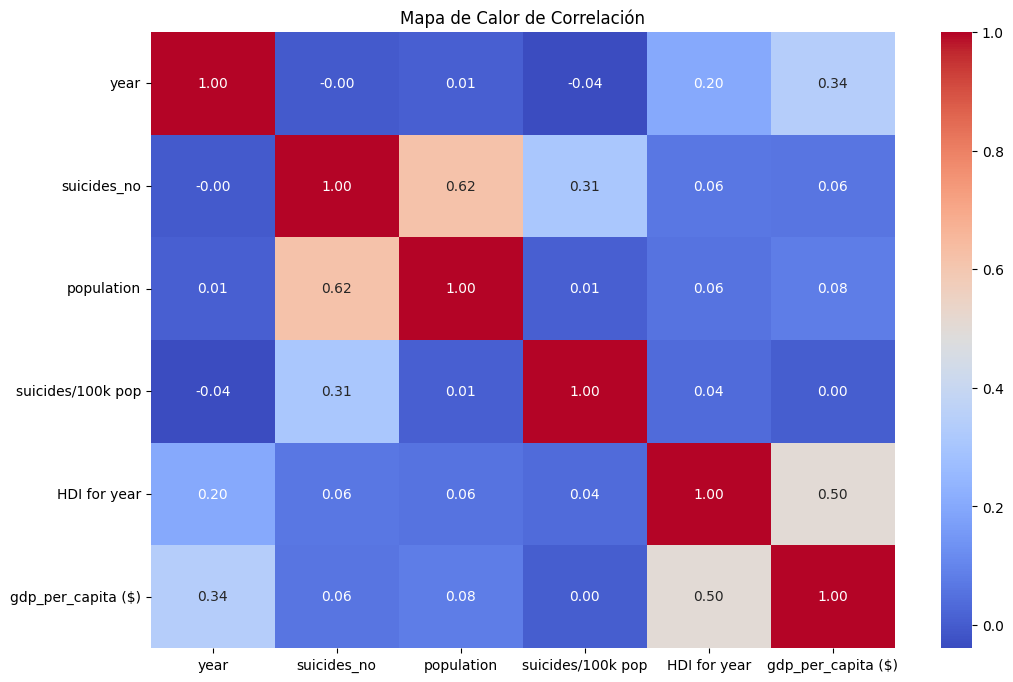

year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.004546    0.008850          -0.039037   
suicides_no        -0.004546     1.000000    0.616162           0.306604   
population          0.008850     0.616162    1.000000           0.008285   
suicides/100k pop  -0.039037     0.306604    0.008285           1.000000   
HDI for year        0.202184     0.063224    0.057240           0.037894   
gdp_per_capita ($)  0.339134     0.061330    0.081510           0.001785   

                    HDI for year  gdp_per_capita ($)  
year                    0.202184            0.339134  
suicides_no             0.063224            0.061330  
population              0.057240            0.081510  
suicides/100k pop       0.037894            0.001785  
HDI for year            1.000000            0.502250  
gdp_per_capita ($)      0.502250            1.000000

In [48]:
# Mapa de Calor de Correlación
plt.figure(figsize=(12, 8))
correlation_matrix = datos.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()
display(pd.DataFrame(correlation_matrix))

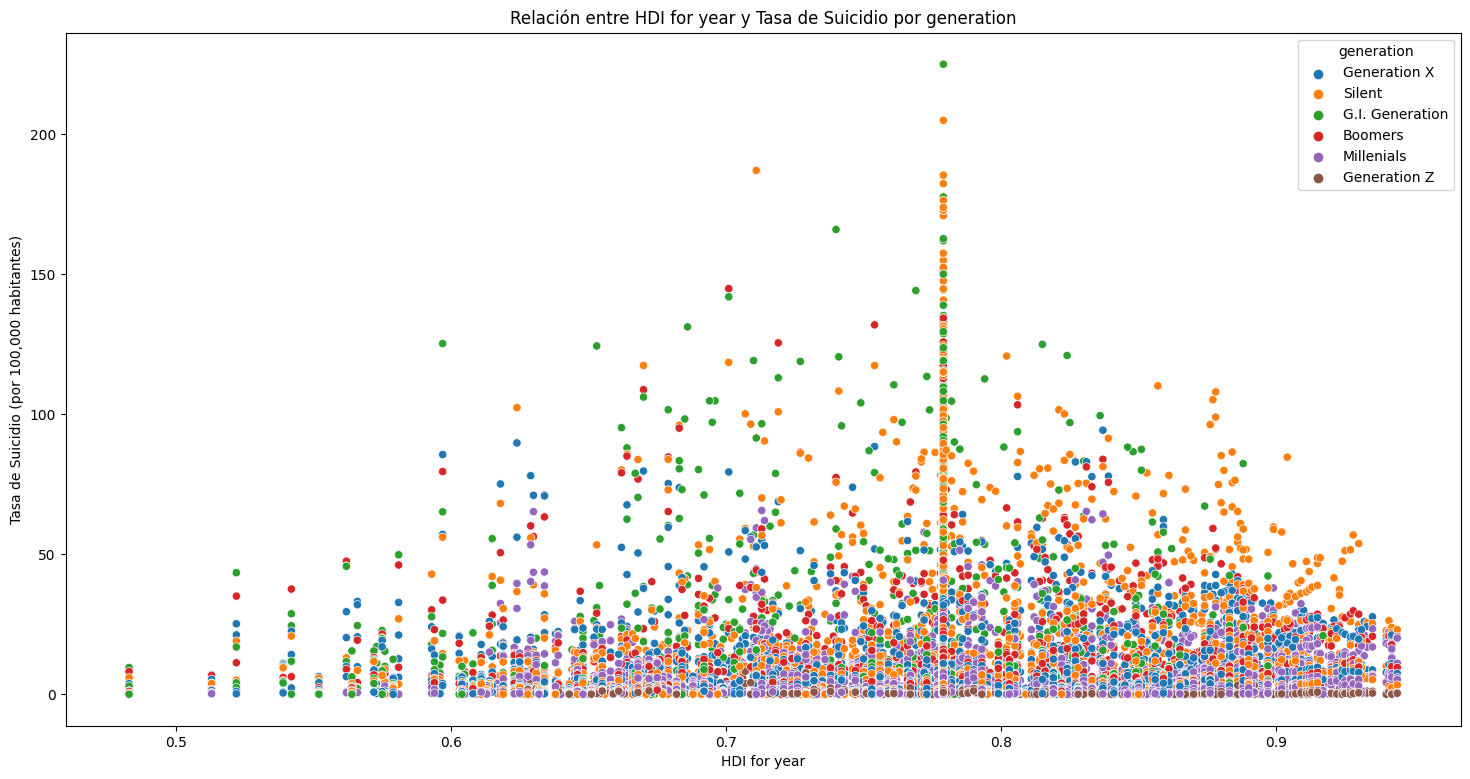

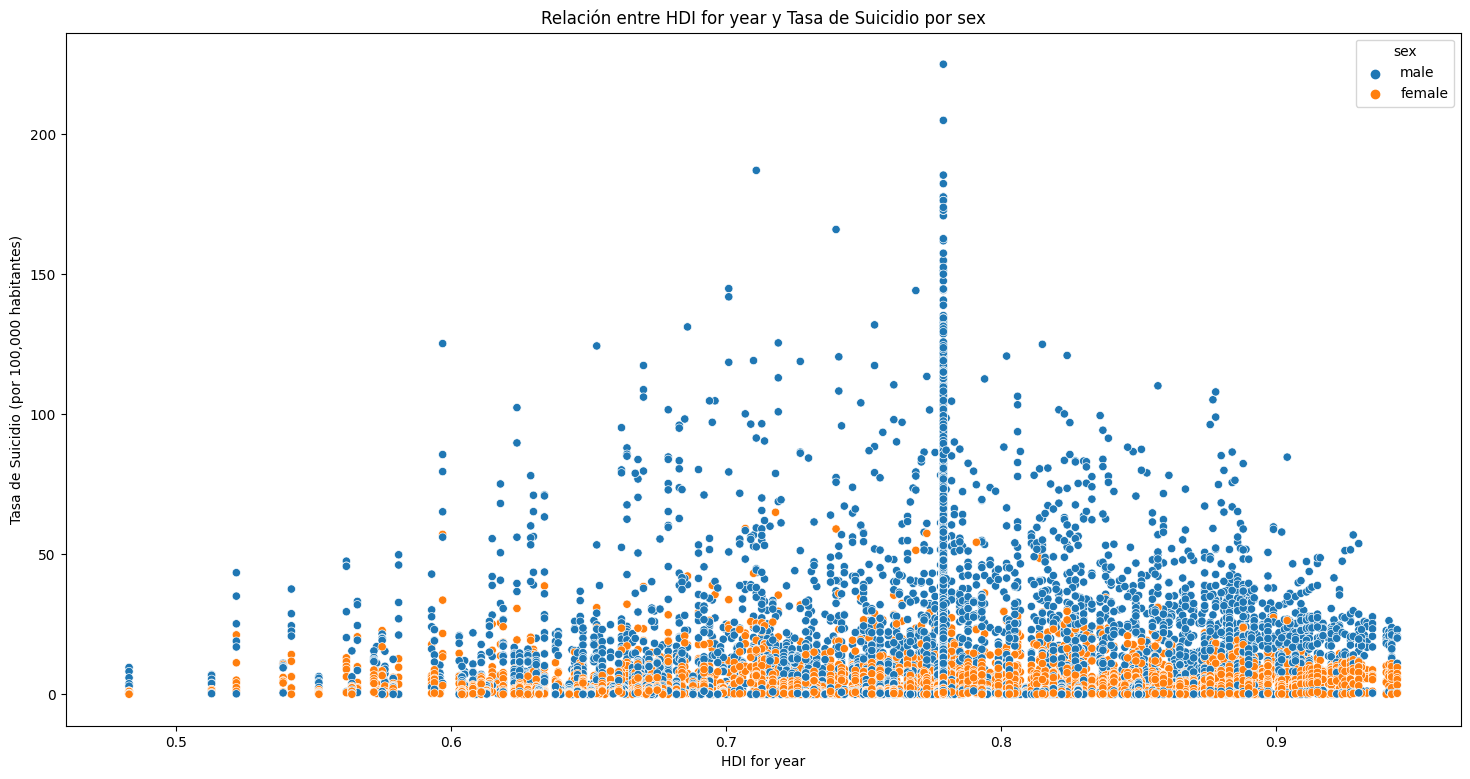

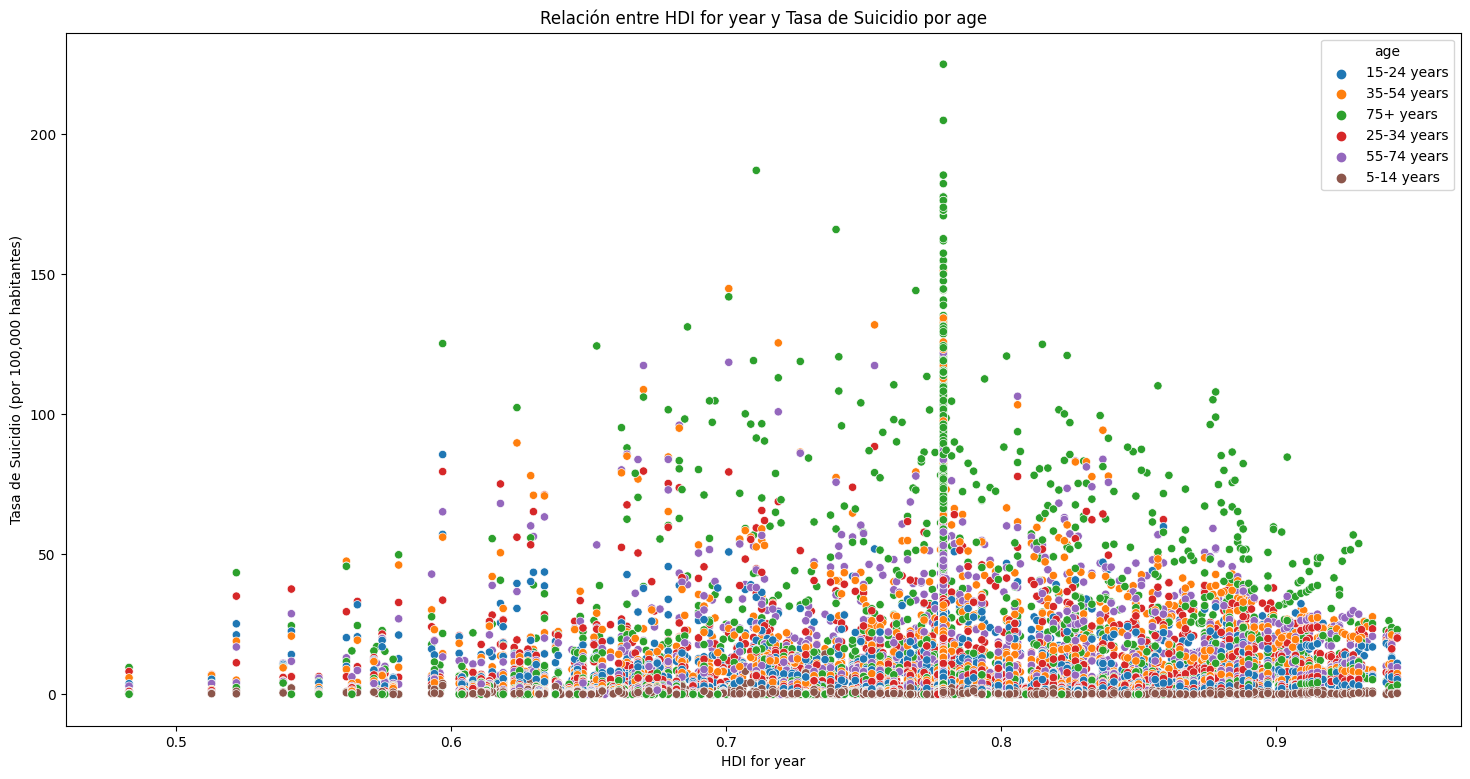

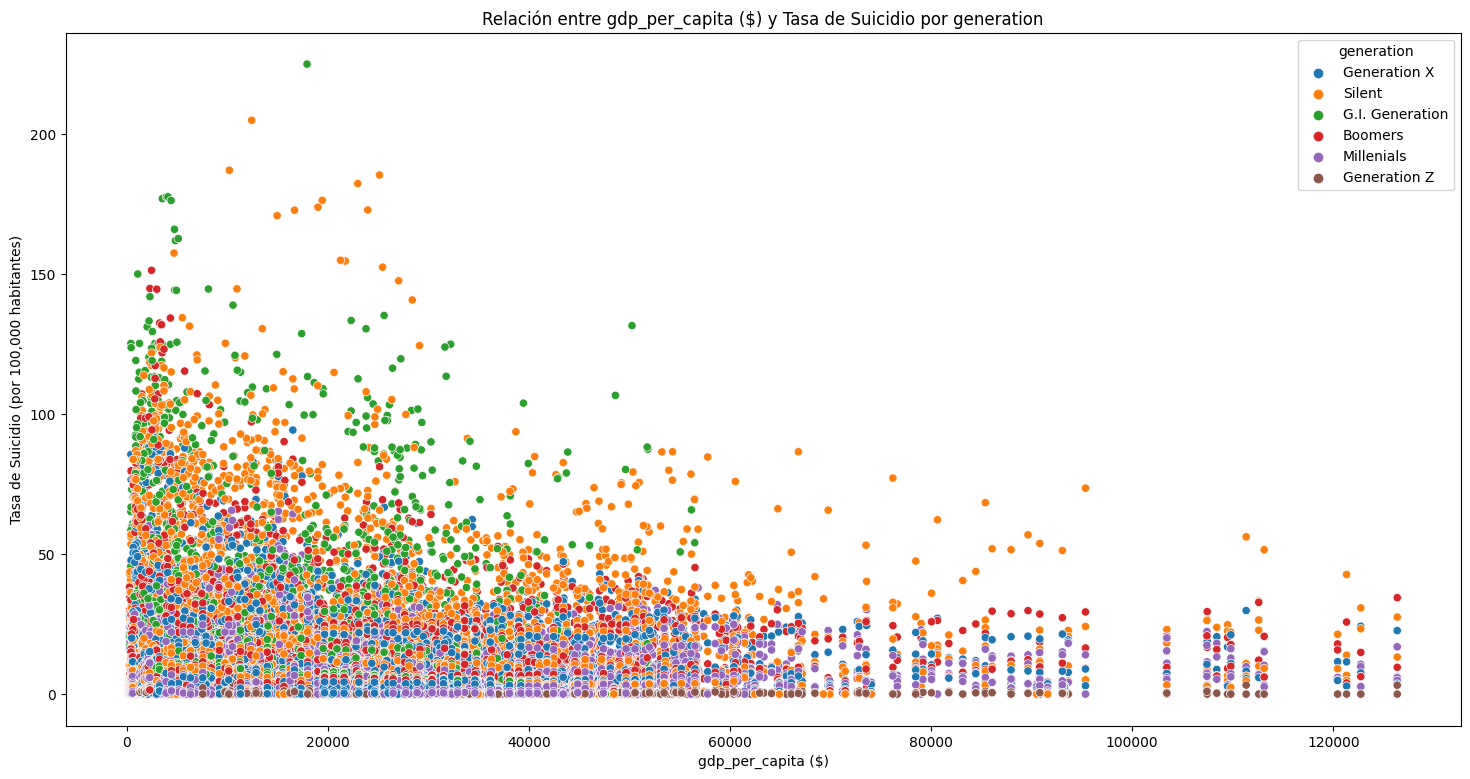

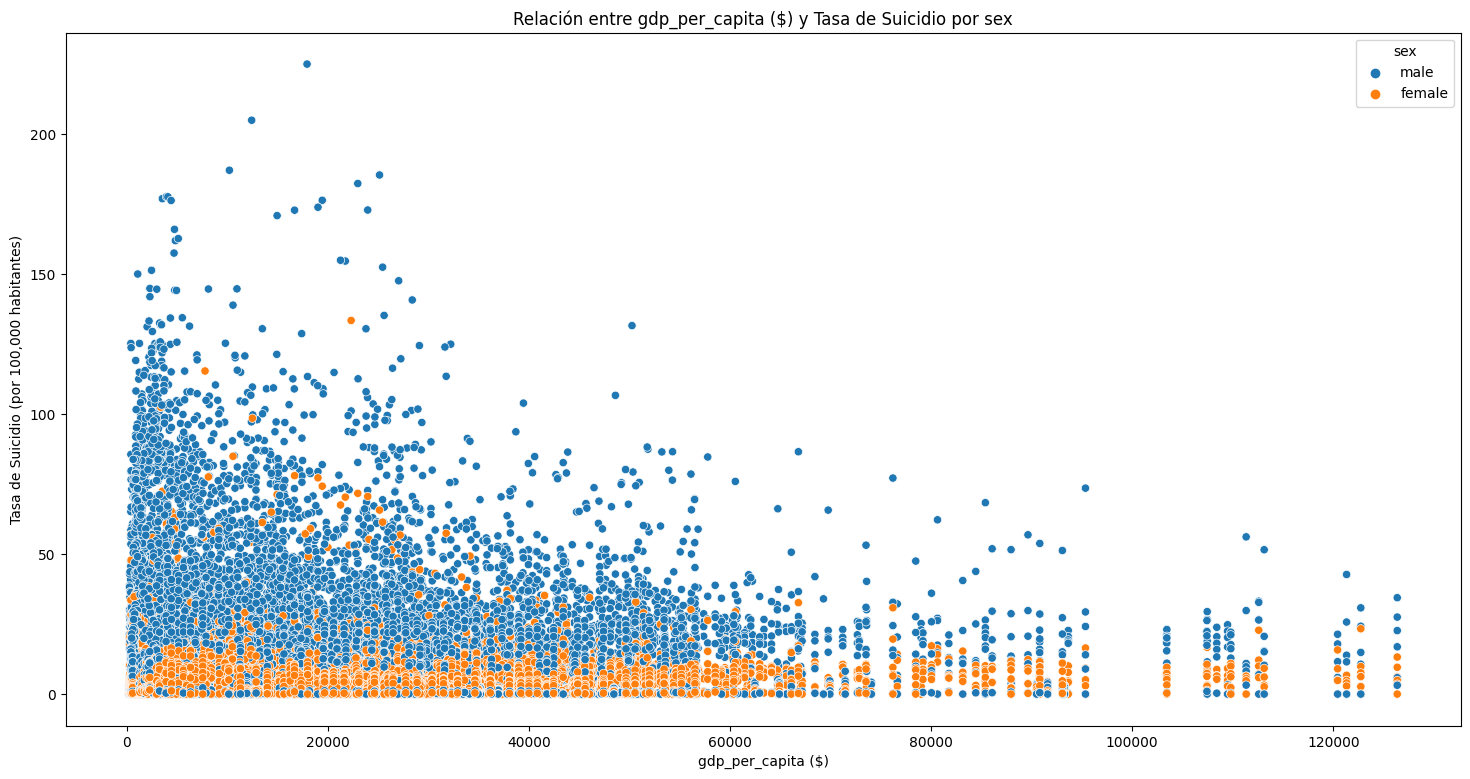

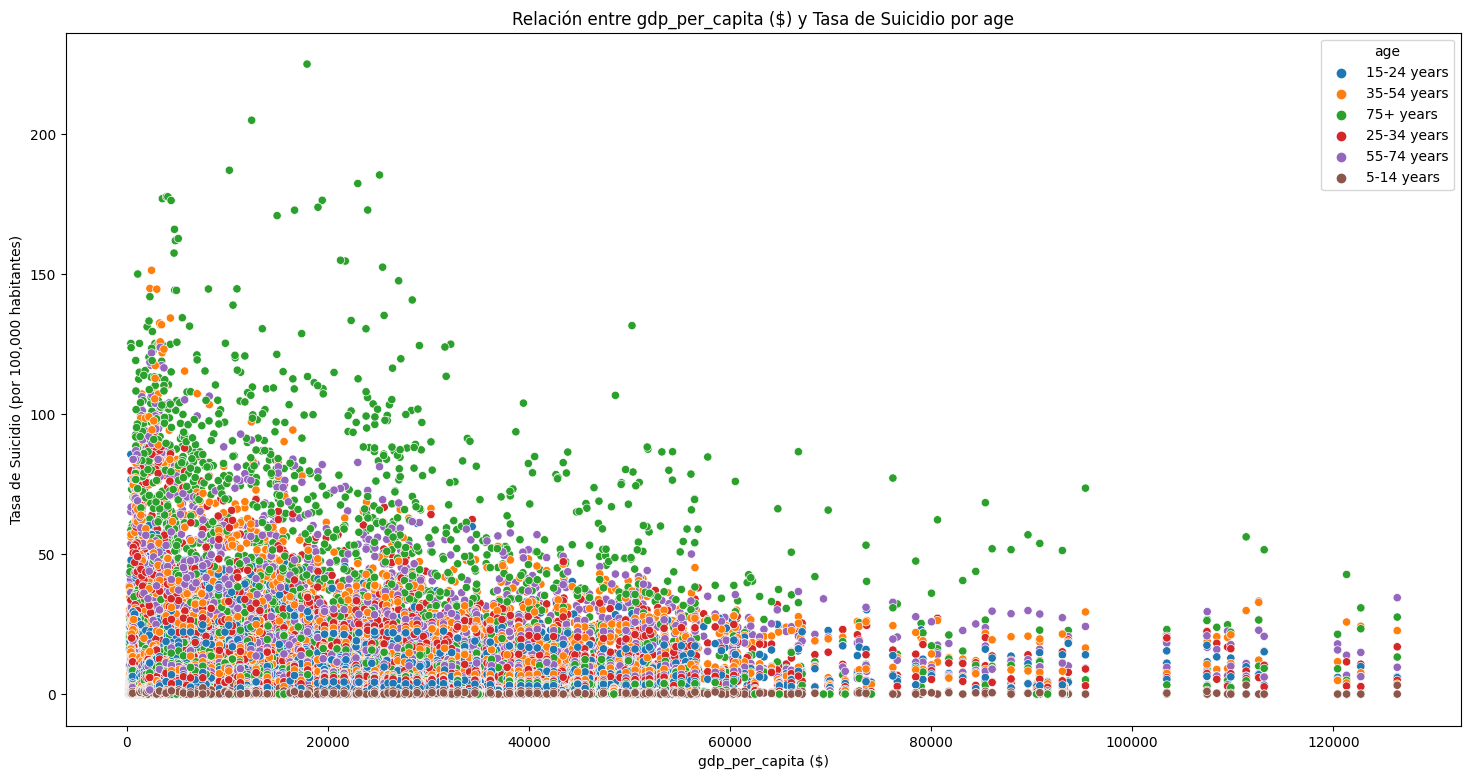

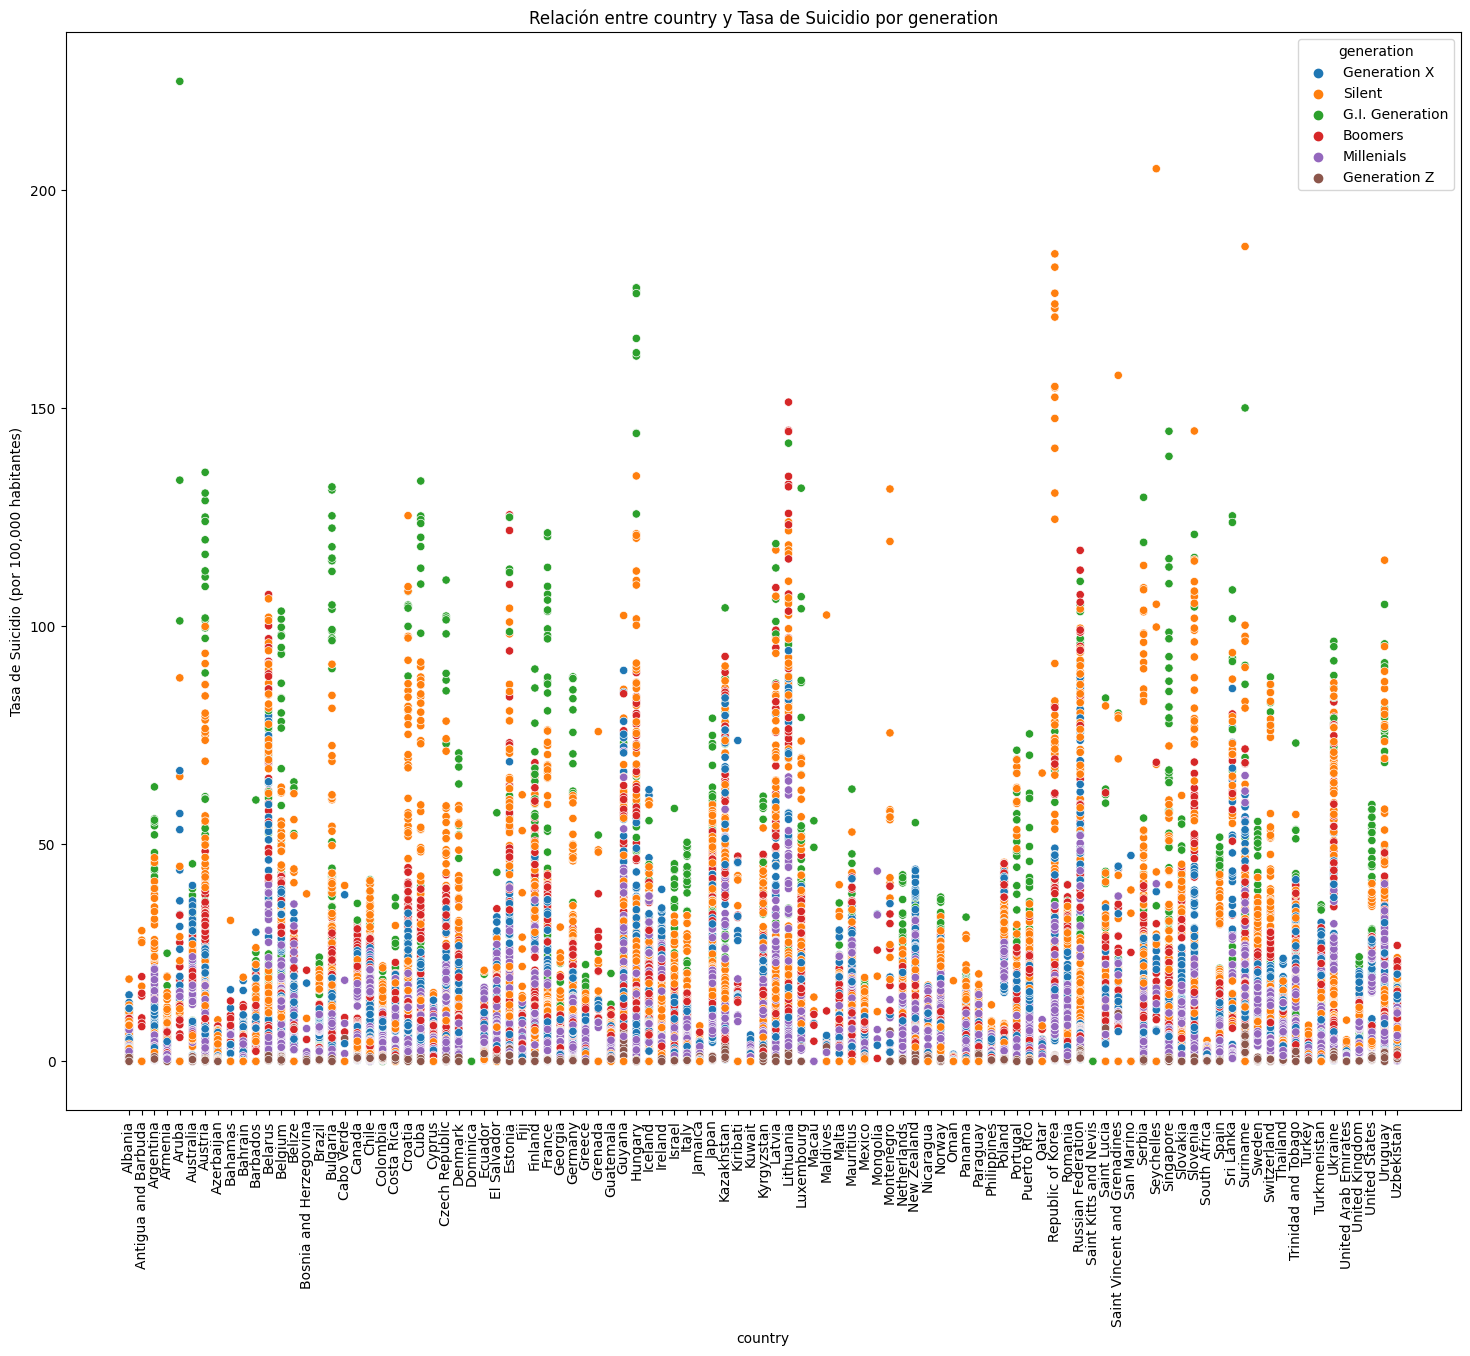

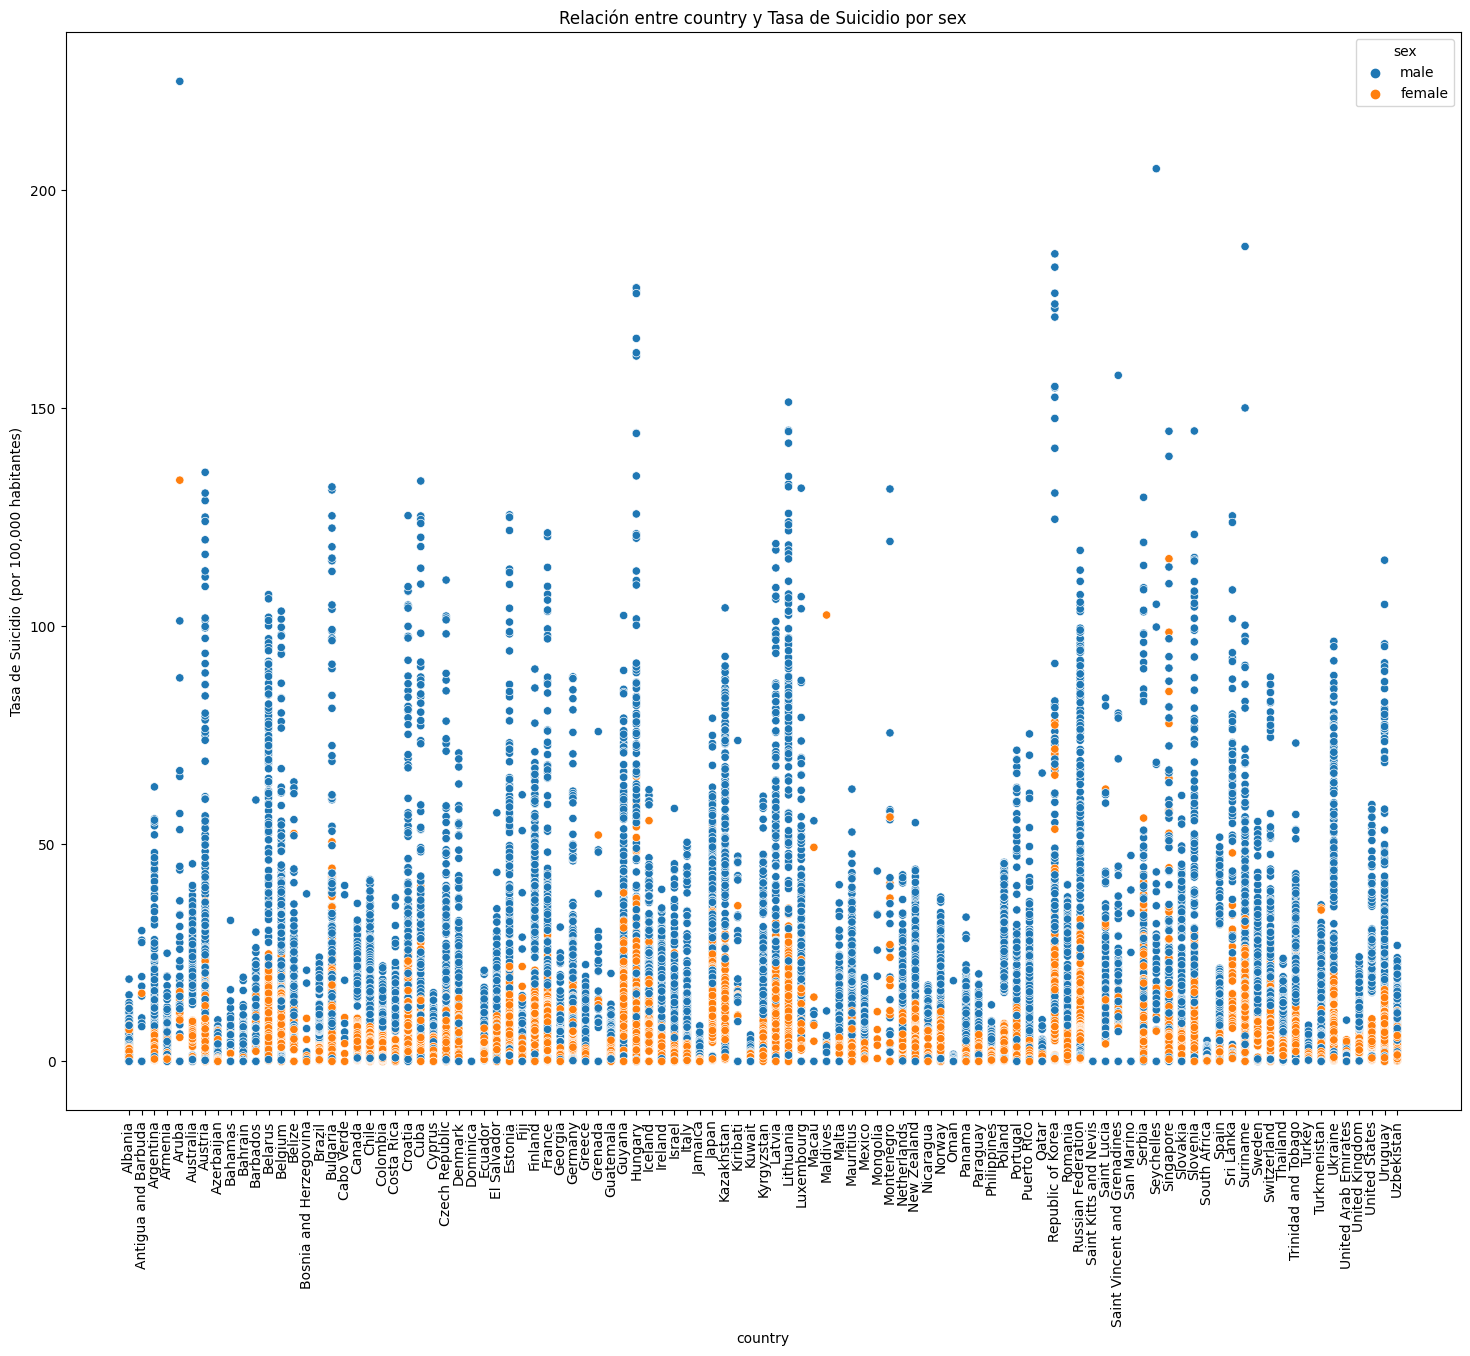

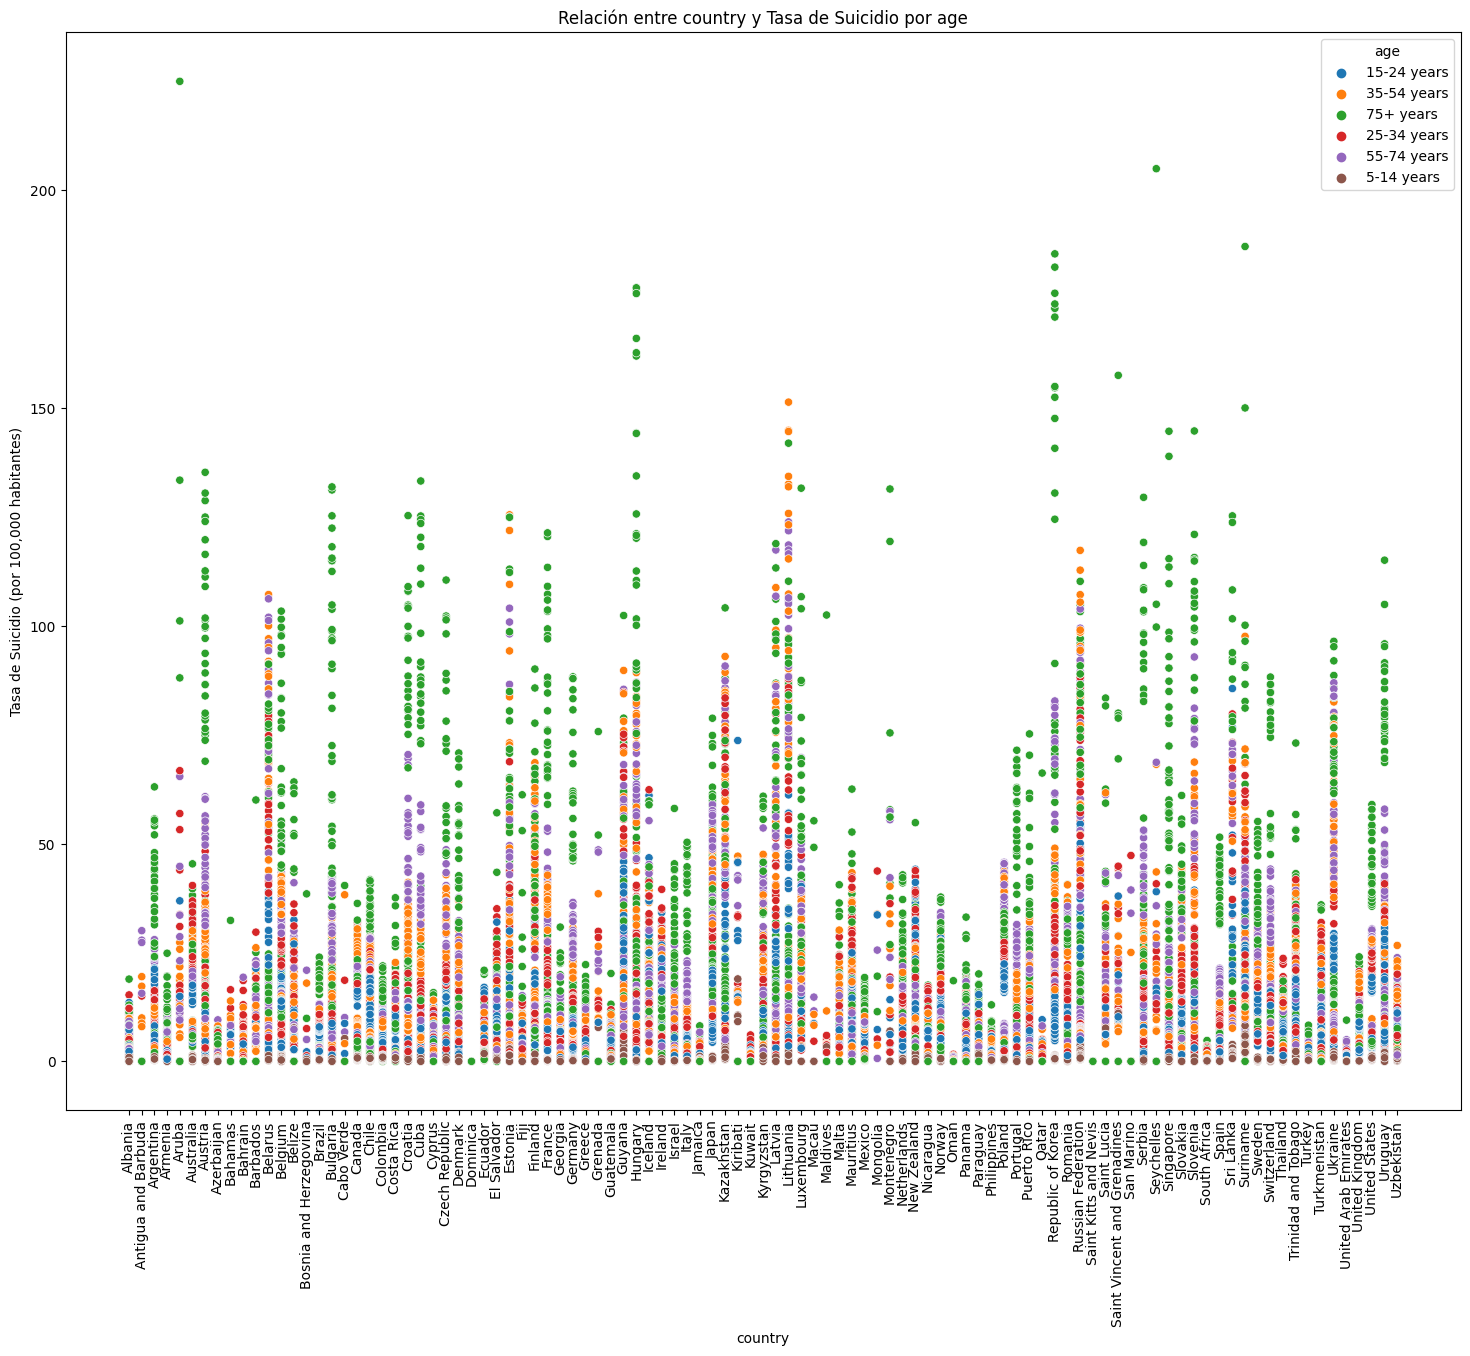

Resumen de correlación con HDI:


Variable Numérica  Correlación con HDI
0         suicides_no             0.063224
1          population             0.057240
2   suicides/100k pop             0.037894
3        HDI for year             1.000000
4  gdp_per_capita ($)             0.502250
5                year             0.202184


Resumen de correlación con GDP:


Variable Numérica  Correlación con GDP
0         suicides_no             0.061330
1          population             0.081510
2   suicides/100k pop             0.001785
3        HDI for year             0.502250
4  gdp_per_capita ($)             1.000000
5                year             0.339134

In [59]:
# Listas de columnas categóricas y numéricas
categorical_cols = ['generation', 'sex', 'age', ]
numeric_cols = ['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)', 'year']

# Crear un gráfico de dispersión para Tasa de Suicidio vs. Índice de Desarrollo Humano (HDI) y otras variables categóricas
for col in ['HDI for year', 'gdp_per_capita ($)', 'country']:
    for hue in categorical_cols:
        if col == "country":
            plt.figure(figsize=(18,14))
            plt.xticks(rotation=90) 
            plt.sort
        else:
            plt.figure(figsize=(18, 9))
            
        sns.scatterplot(x=col, y="suicides/100k pop", hue=hue, data=datos)
        plt.title(f"Relación entre {col} y Tasa de Suicidio por {hue}")
        plt.xlabel(col)

        plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
        plt.show()

# Calcular la correlación entre "HDI for year" y todas las variables numéricas
correlation_hdi = datos[numeric_cols].corr()['HDI for year']

# Calcular la correlación entre "gdp_per_capita ($)" y todas las variables numéricas
correlation_gdp = datos[numeric_cols].corr()['gdp_per_capita ($)']

# Crear DataFrames para los resultados
result_hdi = pd.DataFrame({'Variable Numérica': correlation_hdi.index, 'Correlación con HDI': correlation_hdi.values})
result_gdp = pd.DataFrame({'Variable Numérica': correlation_gdp.index, 'Correlación con GDP': correlation_gdp.values})

# Mostrar las tablas de resumen
print("Resumen de correlación con HDI:")
display(result_hdi)
print("\nResumen de correlación con GDP:")
display(result_gdp)

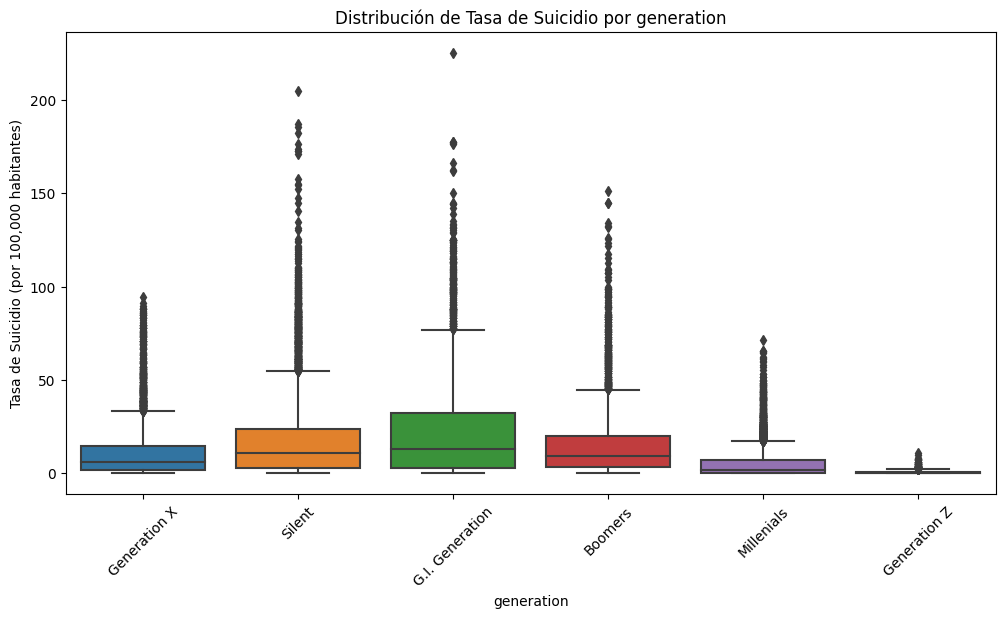

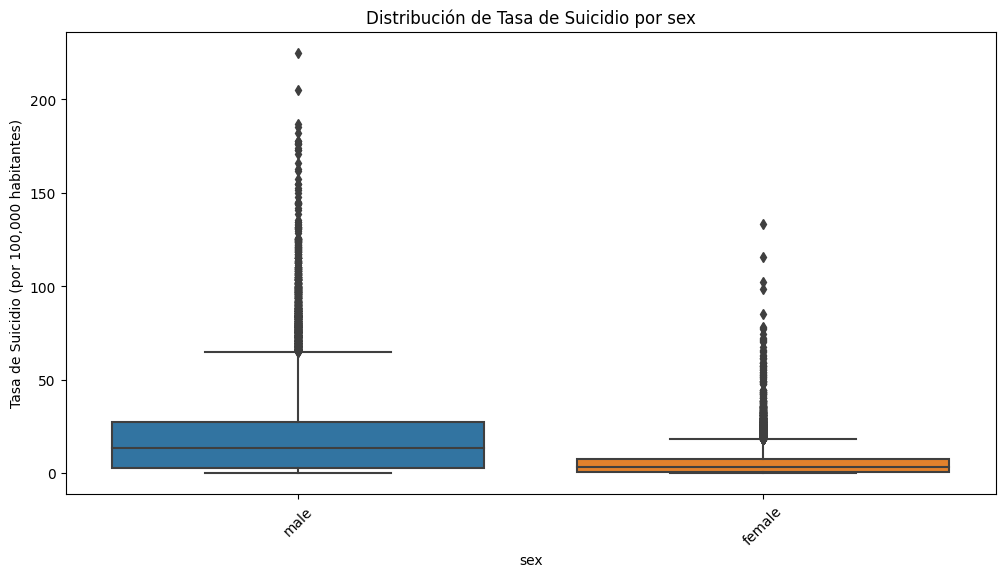

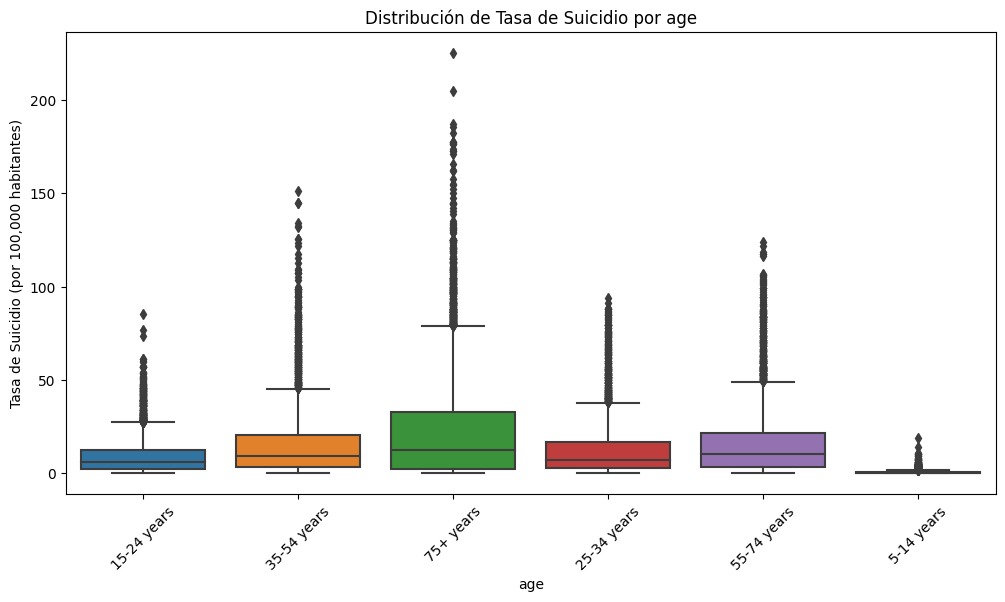

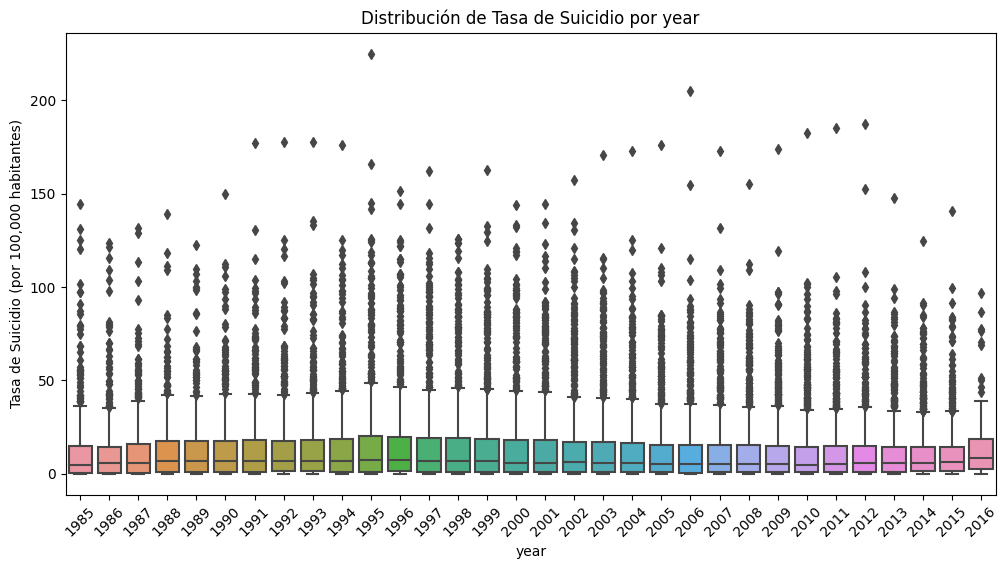

DataFrame de resúmenes de estadísticas descriptivas:


count       mean        std  min     25%     50%      75%  \
generation                                                                    
Boomers          4990.0  14.742094  17.443697  0.0  3.5900   9.060  20.1300   
G.I. Generation  2744.0  23.946378  29.431211  0.0  2.9975  13.025  32.5650   
Generation X     6408.0  10.556874  13.259527  0.0  1.8275   5.915  14.4225   
Generation Z     1470.0   0.642299   1.044738  0.0  0.0000   0.330   0.8775   
Millenials       5844.0   5.383597   8.464176  0.0  0.2700   1.720   7.0000   
Silent           6364.0  18.418848  23.216520  0.0  2.6875  10.735  23.5000   

                    max  
generation               
Boomers          151.33  
G.I. Generation  224.97  
Generation X      94.28  
Generation Z      11.02  
Millenials        71.17  
Silent           204.92

count       mean        std  min     25%    50%    75%     max
sex                                                                     
female  13910.0   5.392866   7.358993  0.0  0.4100   3.16   7.41  133.42
male    13910.0  20.239329  23.552754  0.0  2.4225  13.55  27.36  224.97

count       mean        std  min     25%     50%      75%  \
age                                                                       
15-24 years  4642.0   8.947154   9.578081  0.0  2.4125   5.915  12.3600   
25-34 years  4642.0  12.186885  14.107455  0.0  2.9300   7.250  16.9775   
35-54 years  4642.0  14.947441  17.700421  0.0  3.6500   9.080  20.4600   
5-14 years   4610.0   0.620041   1.017878  0.0  0.0000   0.320   0.8100   
55-74 years  4642.0  16.155579  18.240465  0.0  3.4500  10.405  21.7875   
75+ years    4642.0  23.955409  30.239147  0.0  2.1525  12.470  32.9275   

                max  
age                  
15-24 years   85.59  
25-34 years   94.18  
35-54 years  151.33  
5-14 years    18.92  
55-74 years  123.83  
75+ years    224.97

count       mean        std  min     25%    50%      75%     max
year                                                                   
1985   576.0  11.826198  19.216259  0.0  0.2800  4.740  14.7825  144.65
1986   576.0  11.423333  17.631921  0.0  0.3275  5.565  14.2300  123.72
1987   648.0  11.644213  16.919688  0.0  0.4700  5.670  16.0875  131.87
1988   588.0  12.709405  17.183725  0.0  0.8275  6.990  17.4375  138.89
1989   624.0  12.879071  17.437589  0.0  0.9625  6.945  17.4525  122.41
1990   768.0  12.862956  17.741396  0.0  0.9750  6.560  17.6000  150.00
1991   768.0  13.438880  19.116333  0.0  0.9600  6.560  17.8100  176.91
1992   780.0  13.498564  18.895867  0.0  1.2250  6.735  17.6275  177.61
1993   780.0  13.833705  19.803867  0.0  1.2800  6.735  18.1850  177.57
1994   816.0  14.073272  20.413814  0.0  1.0950  6.705  18.5925  176.26
1995   936.0  15.662671  23.814197  0.0  1.1725  7.145  20.4225  224.97
1996   924.0  15.305422  22.274584  0.0  1.4100  7.190  19.6825  151.33
1997   924.0  14.954361  22.084821  0.0  1.1225  6.835  18.9900  161.92
1998   948.0  14.926920  21.562311  0.0  1.1500  6.810  19.2350  125.78
1999   996.0  14.532038  21.230050  0.0  1.0250  6.665  18.6725  162.67
2000  1032.0  13.941328  21.286035  0.0  0.6850  5.900  18.1775  144.15
2001  1056.0  13.519138  20.157330  0.0  0.7000  5.780  18.0225  144.71
2002  1032.0  13.786550  20.577852  0.0  0.9300  6.280  17.0625  157.48
2003  1032.0  13.205019  19.794115  0.0  0.8700  5.765  16.8525  170.86
2004  1008.0  12.481944  18.529545  0.0  0.7575  5.735  16.5075  172.80
2005  1008.0  12.068442  18.036566  0.0  0.7950  5.130  15.5625  176.33
2006  1020.0  11.927461  18.573808  0.0  0.5600  5.000  15.2700  204.92
2007  1032.0  12.025339  17.976435  0.0  0.9500  5.225  15.5725  172.86
2008  1020.0  11.907686  17.407436  0.0  0.8575  5.340  15.2150  154.92
2009  1068.0  11.400787  17.033137  0.0  0.7650  5.060  15.0575  173.86
2010  1056.0  11.215900  16.940294  0.0  0.7975  4.815  14.3650  182.32
2011  1032.0  11.015349  16.350161  0.0  0.8975  4.950  14.6775  185.37
2012   972.0  11.421718  16.782081  0.0  1.0250  5.760  15.0075  187.06
2013   960.0  11.107958  15.829527  0.0  0.8575  5.530  14.5175  147.59
2014   936.0  11.011464  15.163112  0.0  1.2675  5.565  14.1775  124.45
2015   744.0  11.094073  15.144091  0.0  1.3075  6.065  14.2325  140.74
2016   160.0  13.421188  17.082094  0.0  2.5875  8.250  18.7075   96.98

In [50]:
# Crear un diccionario para almacenar los resúmenes
summary_results = {}

for col in categorical_cols + ['year']:
    # Crear un gráfico de caja
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y="suicides/100k pop", data=datos)
    plt.title(f"Distribución de Tasa de Suicidio por {col}")
    plt.xlabel(col)
    plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
    plt.xticks(rotation=45)
    plt.show()

    # Calcular estadísticas descriptivas para el grupo
    grouped_data = datos.groupby(col)['suicides/100k pop']
    summary = grouped_data.describe()

    # Almacena el resumen en el diccionario
    summary_results[col] = summary

# Imprimir el DataFrame de resúmenes
print("DataFrame de resúmenes de estadísticas descriptivas:")
for col, summary in summary_results.items():
    display(summary)

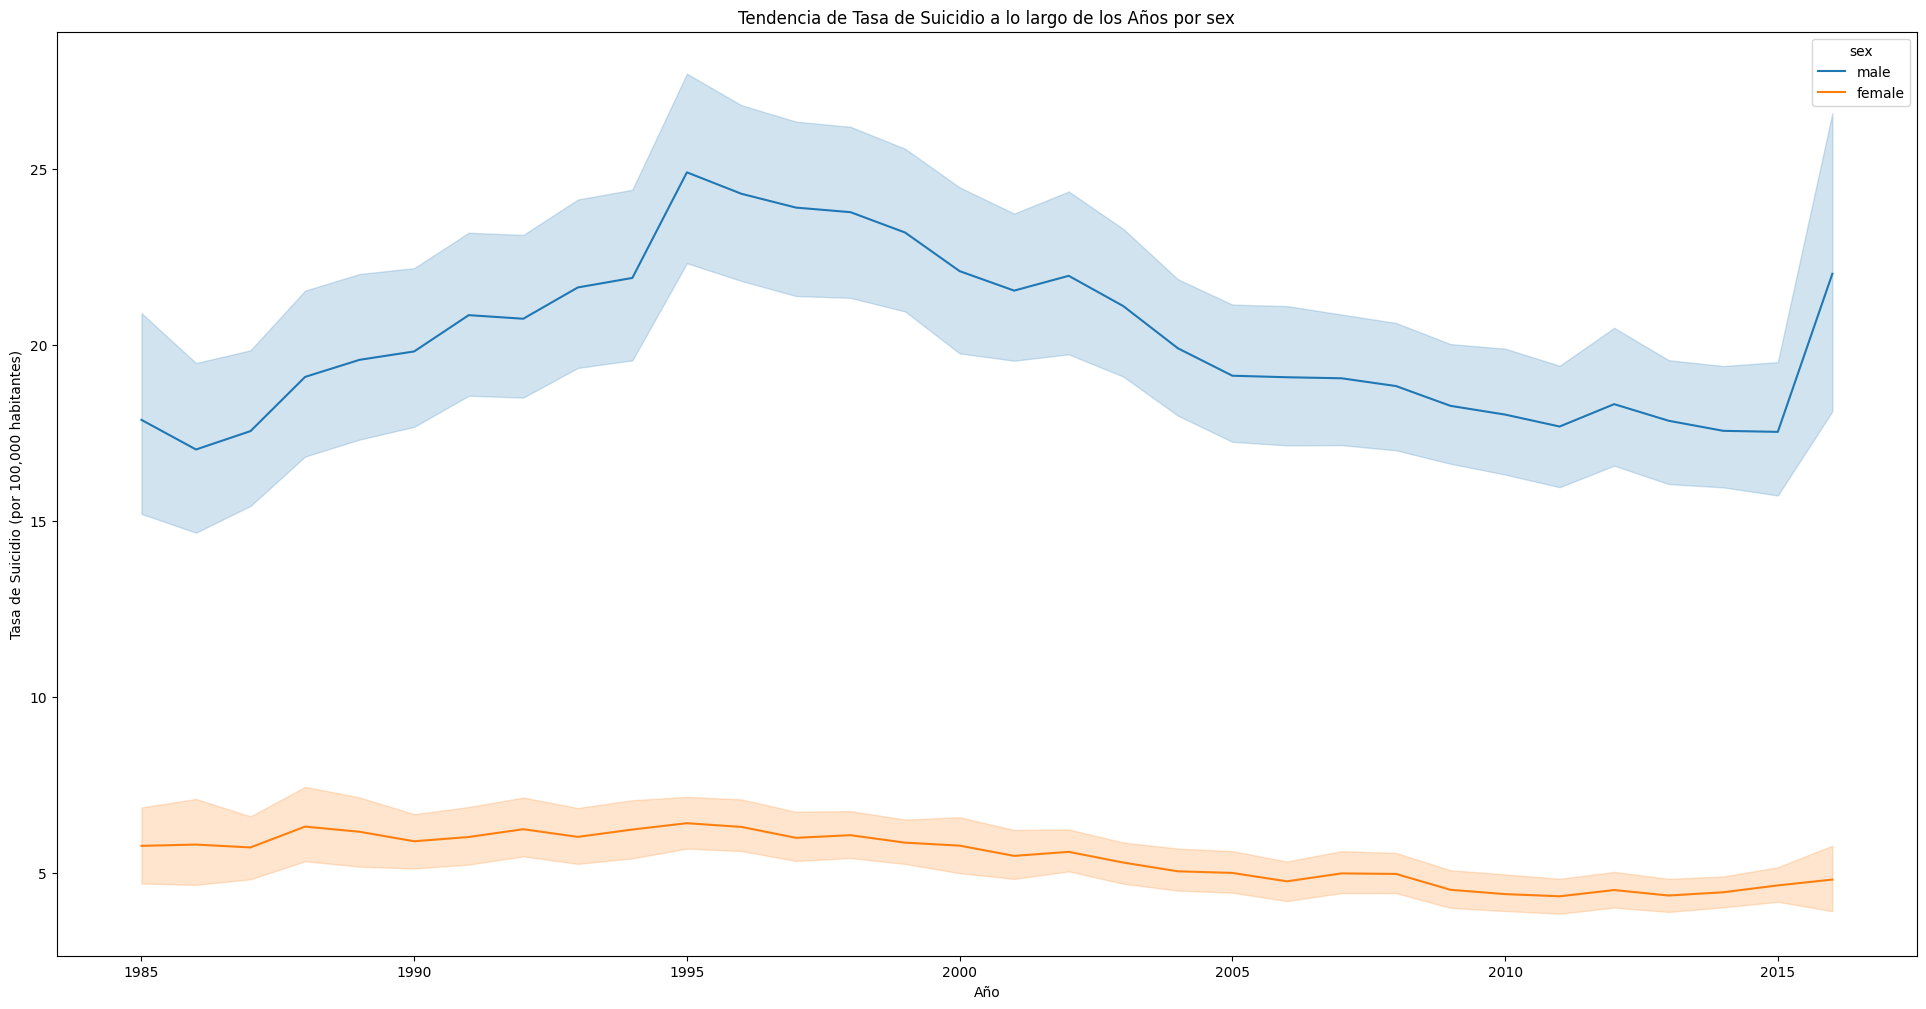

DataFrame de resúmenes de estadísticas descriptivas para hombres (sex):


count       mean        std  min     25%     50%      75%     max
year sex                                                                    
1985 male  288.0  17.875486  23.947288  0.0  0.6900  10.085  23.9125  144.65
1986 male  288.0  17.033993  21.365299  0.0  0.7850   9.635  23.8100  123.72
1987 male  324.0  17.556296  20.810102  0.0  1.2175  10.545  26.2375  131.87
1988 male  294.0  19.095408  20.609586  0.0  3.6575  13.920  27.8500  138.89
1989 male  312.0  19.581314  20.990930  0.0  4.5225  14.360  28.0400  122.41
1990 male  384.0  19.818906  21.763991  0.0  3.1150  14.190  27.3650  150.00
1991 male  384.0  20.849792  23.568952  0.0  3.1650  14.390  29.2125  176.91
1992 male  390.0  20.747462  23.343777  0.0  3.1900  14.905  28.3550  177.61
1993 male  390.0  21.636154  24.525221  0.0  3.5850  14.880  28.7275  177.57
1994 male  408.0  21.906520  25.273440  0.0  2.9425  14.510  29.1325  176.26
1995 male  468.0  24.905256  29.914628  0.0  3.7575  16.370  32.5300  224.97
1996 male  462.0  24.296472  27.701921  0.0  4.2475  15.870  32.3500  151.33
1997 male  462.0  23.903983  27.582328  0.0  3.5100  14.870  32.2350  161.92
1998 male  474.0  23.774198  26.739678  0.0  3.0300  15.950  30.9725  125.78
1999 male  498.0  23.196305  26.404332  0.0  2.8725  15.545  31.2100  162.67
2000 male  516.0  22.099651  26.289207  0.0  1.5825  14.065  29.4475  144.15
2001 male  528.0  21.546345  24.892395  0.0  1.9475  14.450  28.4125  144.71
2002 male  516.0  21.966996  25.800009  0.0  2.4600  14.610  28.8000  157.48
2003 male  516.0  21.107655  24.730540  0.0  1.8900  14.195  27.8475  170.86
2004 male  504.0  19.909762  23.064053  0.0  1.8625  13.875  26.5500  172.80
2005 male  504.0  19.129286  22.499085  0.0  1.9325  12.980  26.0250  176.33
2006 male  510.0  19.085863  23.337862  0.0  1.4700  12.675  25.5700  204.92
2007 male  516.0  19.056667  22.418829  0.0  2.2125  12.550  25.6925  172.86
2008 male  510.0  18.835961  21.600603  0.0  1.7675  12.865  25.5725  154.92
2009 male  534.0  18.273333  21.148287  0.0  1.9125  12.085  25.2100  173.86
2010 male  528.0  18.025682  21.039596  0.0  1.9600  11.860  25.7425  182.32
2011 male  516.0  17.686376  20.334941  0.0  2.2000  12.755  24.2625  185.37
2012 male  486.0  18.321811  20.898820  0.0  2.9725  13.085  25.6950  187.06
2013 male  480.0  17.849708  19.496595  0.0  2.5550  12.685  24.0075  147.59
2014 male  468.0  17.564124  18.721957  0.0  2.8975  12.235  24.9450  124.45
2015 male  372.0  17.534677  18.719036  0.0  3.5525  12.960  24.8625  140.74
2016 male   80.0  22.023750  20.410865  0.0  8.5400  18.480  26.7925   96.98

DataFrame de resúmenes de estadísticas descriptivas para mujeres (sex):


count      mean        std  min     25%    50%     75%     max
year sex                                                                   
1985 female  288.0  5.776910   9.638487  0.0  0.0000  2.270  7.4125   77.55
1986 female  288.0  5.812674  10.158646  0.0  0.0450  2.885  7.9400  115.38
1987 female  324.0  5.732130   8.381871  0.0  0.1600  3.200  7.6850   57.76
1988 female  294.0  6.323401   9.218088  0.0  0.3725  3.560  8.5000   84.91
1989 female  312.0  6.176827   8.852603  0.0  0.3825  3.935  8.5275   98.51
1990 female  384.0  5.907005   7.722798  0.0  0.3175  3.890  7.7275   64.97
1991 female  384.0  6.027969   8.136154  0.0  0.4200  3.605  7.7300   72.44
1992 female  390.0  6.249667   8.045520  0.0  0.5400  4.180  8.3925   60.74
1993 female  390.0  6.031256   7.863752  0.0  0.5425  3.745  7.9400   59.08
1994 female  408.0  6.240025   8.526646  0.0  0.5275  3.770  8.5875   65.37
1995 female  468.0  6.420085   8.327353  0.0  0.5650  3.905  8.4700   59.01
1996 female  462.0  6.314372   7.997835  0.0  0.6350  3.835  8.5050   63.02
1997 female  462.0  6.004740   7.430540  0.0  0.5825  3.895  8.3750   53.84
1998 female  474.0  6.079641   7.678505  0.0  0.5850  3.530  8.2550   50.38
1999 female  498.0  5.867771   7.396422  0.0  0.5000  3.550  8.0775   55.85
2000 female  516.0  5.783004   9.086969  0.0  0.2925  3.220  7.7800  133.42
2001 female  528.0  5.491932   8.041081  0.0  0.3100  2.990  7.4350  102.46
2002 female  516.0  5.606105   6.926651  0.0  0.4900  3.595  7.9225   61.28
2003 female  516.0  5.302384   6.901402  0.0  0.3775  3.400  7.4025   71.26
2004 female  504.0  5.054127   6.697448  0.0  0.3775  2.955  6.9650   78.01
2005 female  504.0  5.007599   6.720423  0.0  0.3050  3.040  7.0425   74.24
2006 female  510.0  4.769059   6.580872  0.0  0.2225  2.580  6.7100   70.33
2007 female  516.0  4.994012   6.727324  0.0  0.4250  2.830  6.7700   70.58
2008 female  510.0  4.979412   6.622414  0.0  0.4700  2.970  7.2900   67.53
2009 female  534.0  4.528240   6.237691  0.0  0.3625  2.480  6.3375   77.22
2010 female  528.0  4.406117   6.237371  0.0  0.3700  2.690  6.3350   71.69
2011 female  516.0  4.344322   5.699717  0.0  0.3775  2.475  6.2025   65.70
2012 female  486.0  4.521626   5.628286  0.0  0.5150  2.650  6.5075   61.40
2013 female  480.0  4.366208   5.519201  0.0  0.4100  2.540  6.4650   53.30
2014 female  468.0  4.458803   4.874627  0.0  0.7900  3.105  6.2500   44.31
2015 female  372.0  4.653468   5.071137  0.0  0.9475  3.150  6.7325   43.57
2016 female   80.0  4.818625   4.561187  0.0  1.3000  3.610  7.3325   23.03

In [51]:
# Gráfico de Líneas Temporales
summary_results = {}

for hue in categorical_cols[1:-1]:
    plt.figure(figsize=(24, 12))
    sns.lineplot(x="year", y="suicides/100k pop", hue=hue, data=datos)
    plt.title(f"Tendencia de Tasa de Suicidio a lo largo de los Años por {hue}")
    plt.xlabel("Año")
    plt.ylabel("Tasa de Suicidio (por 100,000 habitantes)")
    plt.show()

    # Calcular estadísticas descriptivas
    grouped_data = datos.groupby(['year', hue])['suicides/100k pop']
    summary = grouped_data.describe()

    # Almacena el resumen en el diccionario
    summary_results[hue] = summary

    # Verificar si la columna 'sex' está en el diccionario, dividir en dos DataFrames
    if 'sex' in hue:
        male_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == 'male']
        female_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == 'female']

        # Imprimir el DataFrame para hombres
        print(f"DataFrame de resúmenes de estadísticas descriptivas para hombres ({hue}):")
        display(male_summary)

        # Imprimir el DataFrame para mujeres
        print(f"DataFrame de resúmenes de estadísticas descriptivas para mujeres ({hue}):")
        display(female_summary)

    # Verificar si la columna 'age' está en el diccionario, crear un DataFrame para cada grupo de edad
    if 'age' in hue:
        age_groups = datos['age'].unique()
        for age_group in age_groups:
            age_summary = summary_results[hue][summary_results[hue].index.get_level_values(hue) == age_group]

            # Imprimir el DataFrame para el grupo de edad actual
            print(f"DataFrame de resúmenes de estadísticas descriptivas para el grupo de edad {age_group} ({hue}):")
            display(age_summary)

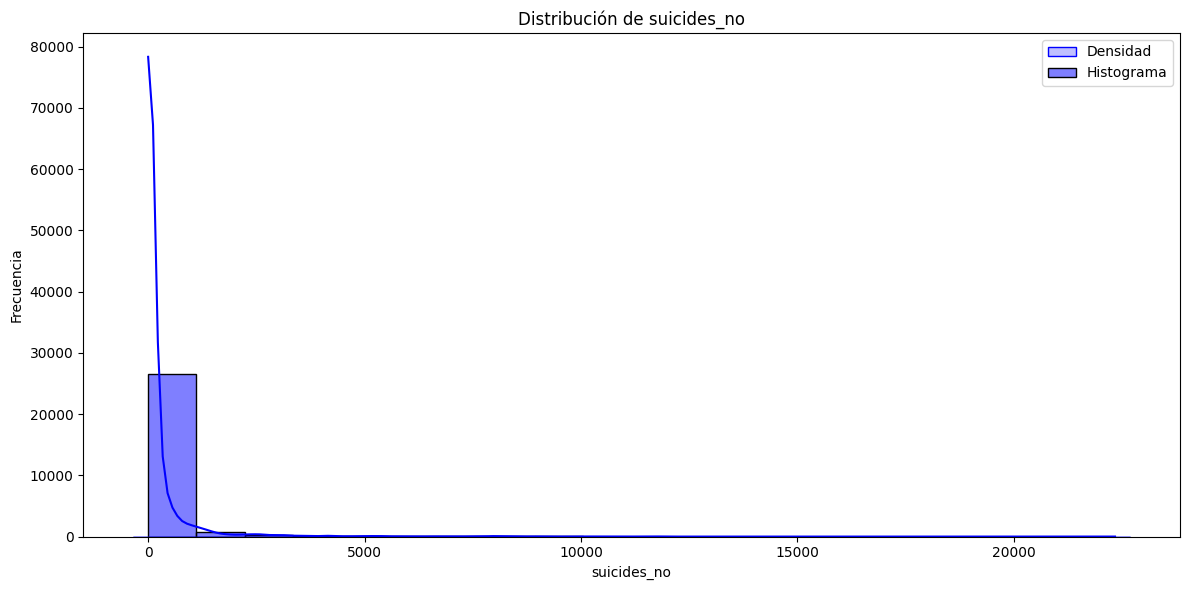

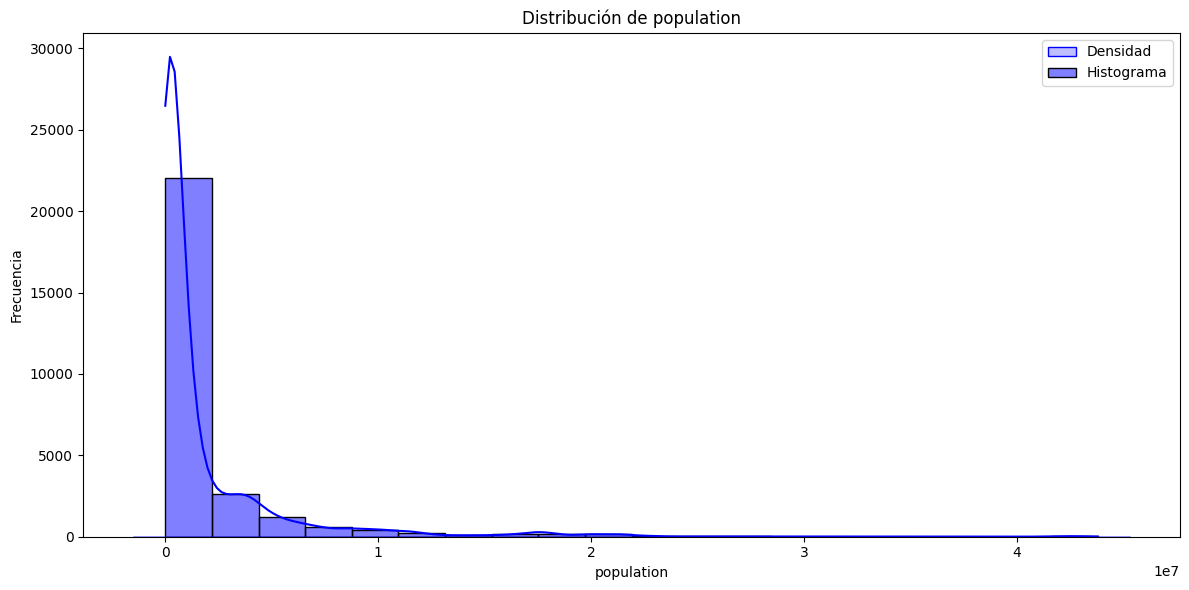

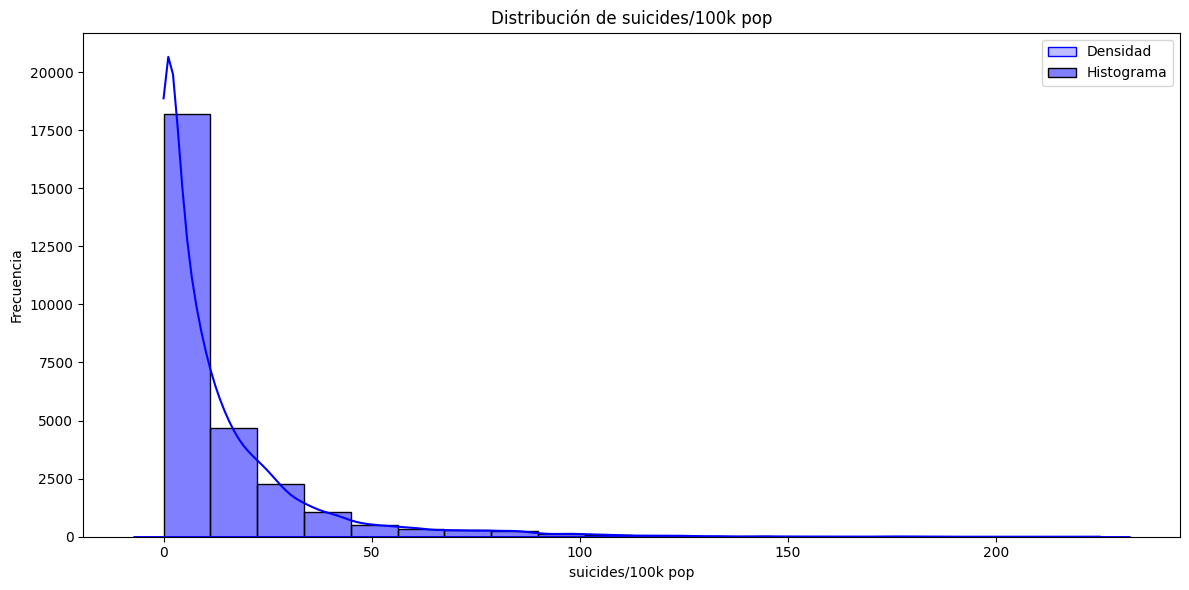

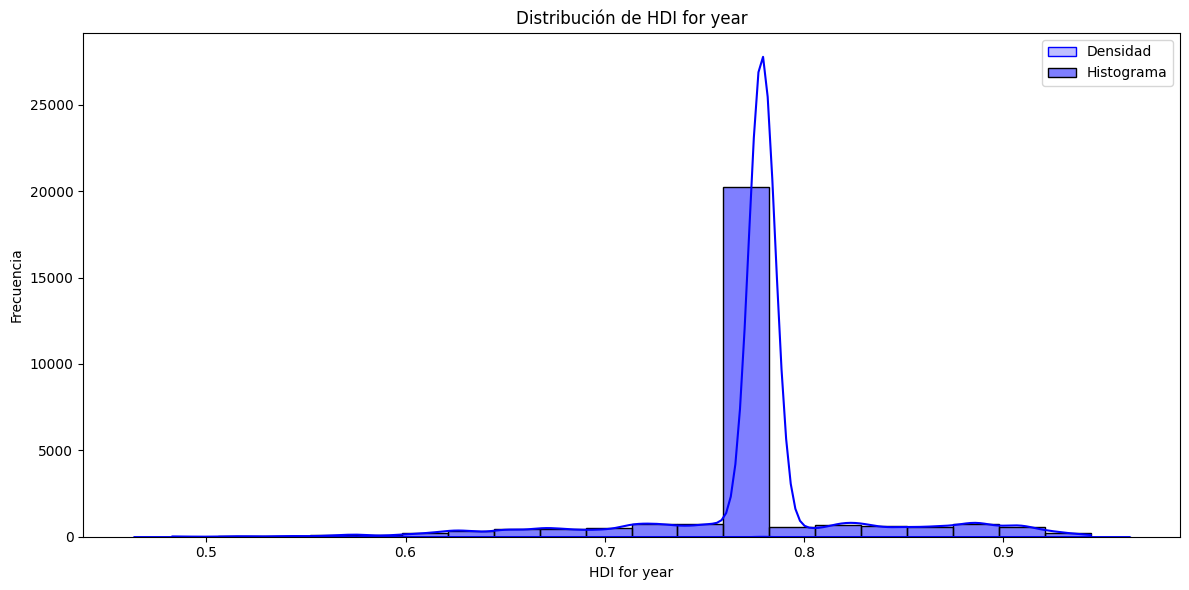

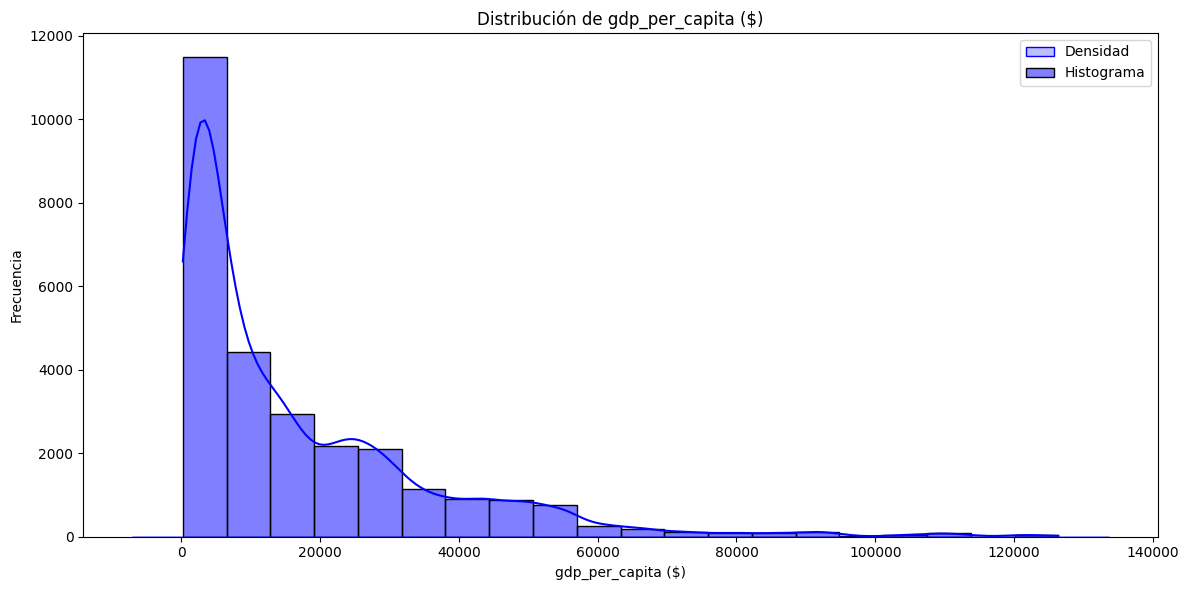

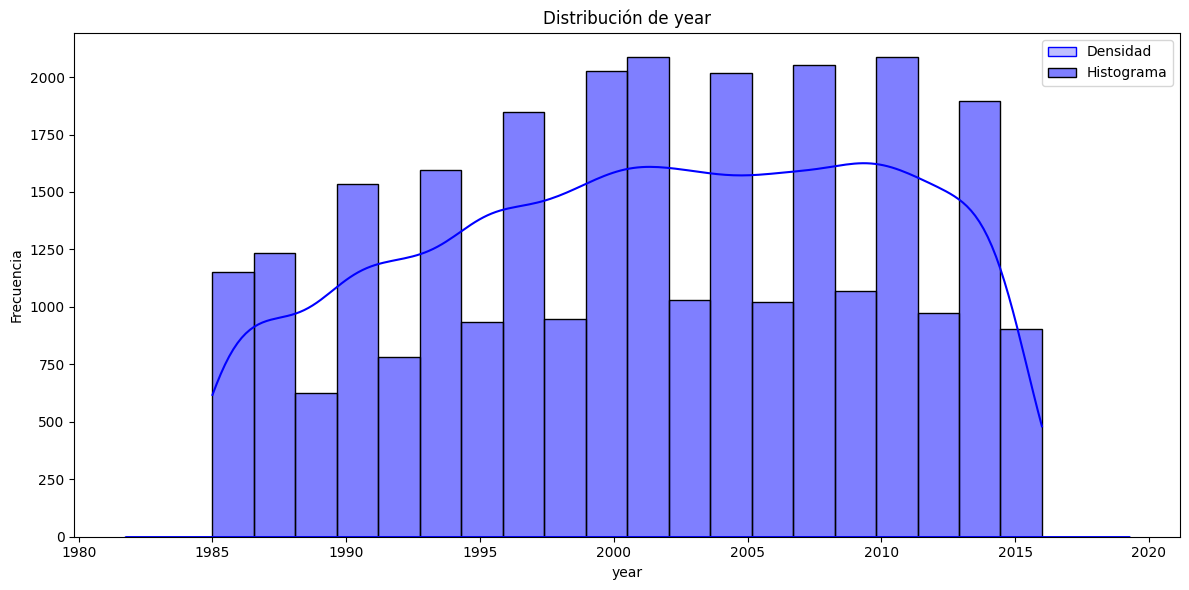

Tabla de estadísticas descriptivas para los histogramas:


Media     Mediana  Desviación Estándar    Mínimo  \
suicides_no         2.425744e+02      25.000         9.020479e+02     0.000   
population          1.844794e+06  430150.000         3.911779e+06   278.000   
suicides/100k pop   1.281610e+01       5.990         1.896151e+01     0.000   
HDI for year        7.782788e-01       0.779         5.120385e-02     0.483   
gdp_per_capita ($)  1.686646e+04    9372.000         1.888758e+04   251.000   
year                2.001258e+03    2002.000         8.469055e+00  1985.000   

                          Máximo  
suicides_no         2.233800e+04  
population          4.380521e+07  
suicides/100k pop   2.249700e+02  
HDI for year        9.440000e-01  
gdp_per_capita ($)  1.263520e+05  
year                2.016000e+03

In [52]:
# Crear subplots para cada columna numérica con un histograma y una curva de densidad
for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(datos[col], bins=20, kde=True, color='blue', label='Histograma')
    sns.kdeplot(datos[col], color='blue', label='Densidad', fill=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Crear un diccionario para almacenar estadísticas descriptivas
summary_stats = {}

# Calcular estadísticas descriptivas para cada columna numérica
for col in numeric_cols:
    stats = {
        'Media': datos[col].mean(),
        'Mediana': datos[col].median(),
        'Desviación Estándar': datos[col].std(),
        'Mínimo': datos[col].min(),
        'Máximo': datos[col].max()
    }
    summary_stats[col] = stats

# Crear DataFrames a partir del diccionario de estadísticas
histogram_summary = pd.DataFrame(summary_stats).T

# Mostrar la tabla de estadísticas para los histogramas
print("Tabla de estadísticas descriptivas para los histogramas:")
display(histogram_summary)


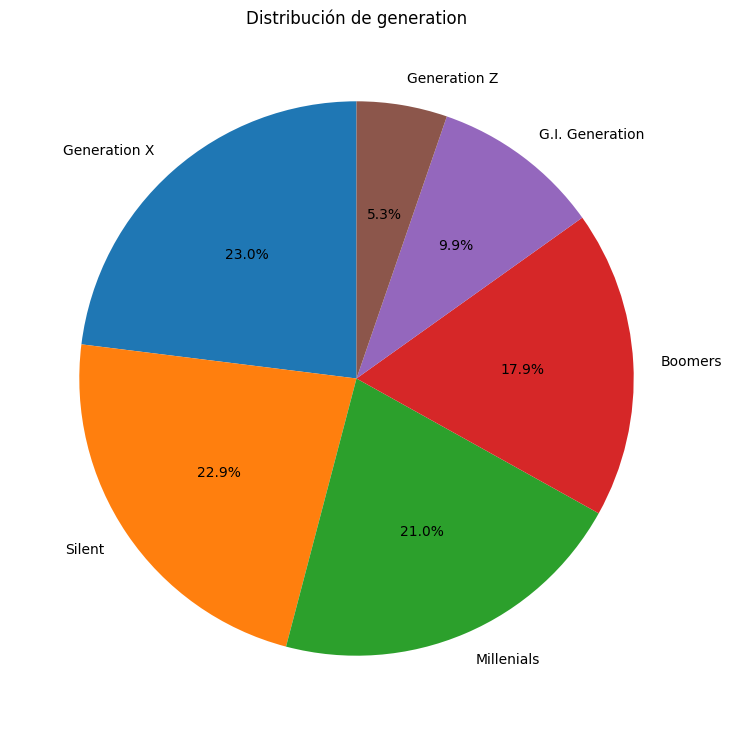

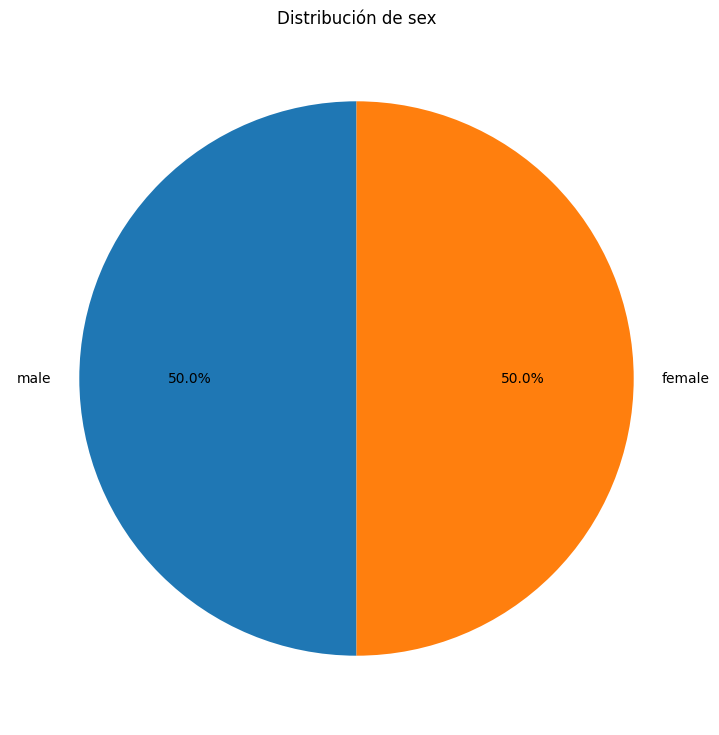

Tablas de resumen de la proporción de variables categóricas:


generation
Generation X           6408
Silent                 6364
Millenials             5844
Boomers                4990
G.I. Generation        2744
Generation Z           1470

sex
male    13910
female  13910

In [53]:
# Diccionario para almacenar resúmenes de variables categóricas
categorical_summary = {}

# Gráfico de Tarta
for col in categorical_cols[:-1]:
    plt.figure(figsize=(9,9))
    datos[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribución de {col}")
    plt.ylabel("")
    plt.show()

    # Calcular el resumen de valores
    value_counts = datos[col].value_counts()
    categorical_summary[col] = value_counts

# Mostrar las tablas de resumen de variables categóricas
print("Tablas de resumen de la proporción de variables categóricas:")
for col, summary in categorical_summary.items():
    
    display(pd.DataFrame(summary))

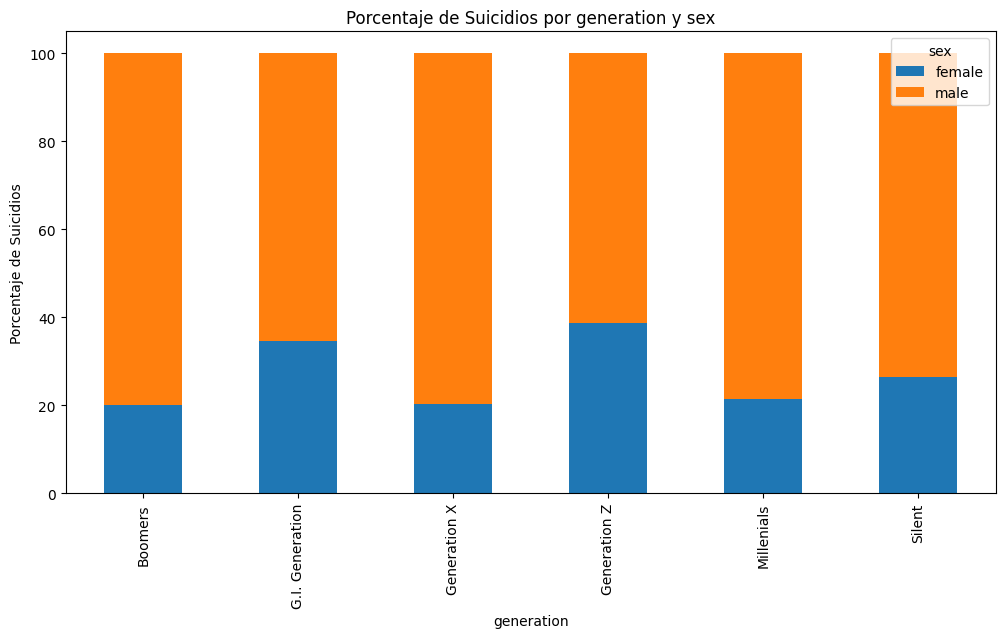

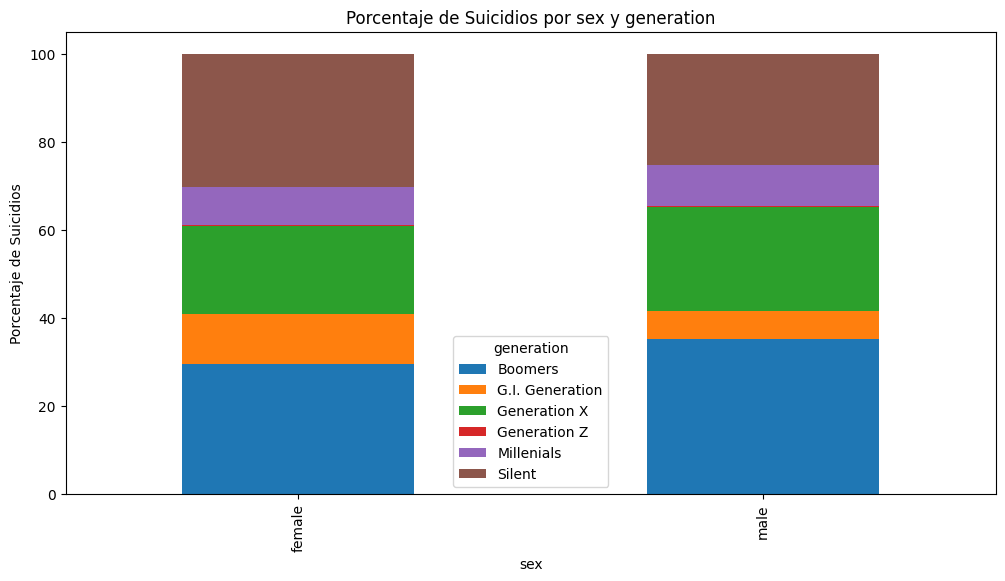

Tablas de resumen de variables categóricas:
Resumen de Porcentaje de Suicidios por generation y sex:


sex                 female       male
generation                           
Boomers          20.178087  79.821913
G.I. Generation  34.637232  65.362768
Generation X     20.213869  79.786131
Generation Z     38.608072  61.391928
Millenials       21.432043  78.567957
Silent           26.507119  73.492881

Resumen de Porcentaje de Suicidios por sex y generation:


generation    Boomers  G.I. Generation  Generation X  Generation Z  \
sex                                                                  
female      29.558515        11.327468     19.867715      0.393778   
male        35.142833         6.424394     23.568823      0.188190   

generation  Millenials     Silent  
sex                                
female        8.568076  30.284448  
male          9.440114  25.235647

In [54]:
categorical_summary = {}

# Gráfico de Barras Apiladas
for col in categorical_cols[:-1]:
    for col2 in categorical_cols[:-1]:
        if col != col2:
            grouped_data = datos.groupby([col, col2])['suicides_no'].sum().unstack()
            stacked_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100  # Calcular porcentaje

            stacked_data.plot(kind='bar', stacked=True, figsize=(12,6))
            plt.title(f"Porcentaje de Suicidios por {col} y {col2}")
            plt.xlabel(col)
            plt.ylabel("Porcentaje de Suicidios")
            plt.show()

            # Almacenar el resumen de porcentajes
            summary = stacked_data
            categorical_summary[f"{col} y {col2}"] = summary

# Mostrar las tablas de resumen de variables categóricas
print("Tablas de resumen de variables categóricas:")
for cols, summary in categorical_summary.items():
    print(f"Resumen de Porcentaje de Suicidios por {cols}:")
    display(summary)



## Mapa de Calor y Tabla de Correlación

El mapa de calor de correlación y la tabla de correlación nos brindan información sobre las relaciones entre las variables numéricas en nuestro conjunto de datos. A continuación, se detallan las correlaciones encontradas:

### Año (year) y Número de suicidios (suicides_no)
La correlación es muy baja (-0.0045), lo que sugiere que no existe una relación lineal fuerte entre el año y el número de suicidios. Esto indica que el número de suicidios no depende fuertemente del año.

### Población (population) y Número de suicidios (suicides_no)
Existe una correlación positiva moderada (0.6162), indicando que un aumento en la población tiende a asociarse con un aumento en el número de suicidios. Sin embargo, esta correlación no implica una relación causal.

### Número de suicidios por cada 100,000 habitantes (suicides/100k pop) y Número de suicidios (suicides_no)
Se observa una correlación positiva moderada (0.3066), lo que significa que un mayor número de suicidios por cada 100,000 habitantes se relaciona con un mayor número total de suicidios.

### HDI (Índice de Desarrollo Humano) para el año (HDI for year) y Número de suicidios (suicides_no)
La correlación es baja (0.0632), sugiriendo que el HDI para el año no influye significativamente en el número de suicidios.

### GDP per capita (Ingreso per cápita en dólares) y Número de suicidios (suicides_no)
Existe una correlación positiva moderada (0.0613), indicando que un mayor ingreso per cápita se asocia con un mayor número de suicidios. Sin embargo, esta correlación es relativamente baja y no implica una relación causal.

### Año (year) y GDP per capita (Ingreso per cápita en dólares)
Hay una correlación positiva (0.3391), sugiriendo que el ingreso per cápita tiende a aumentar con el tiempo.

### HDI (Índice de Desarrollo Humano) para el año (HDI for year) y GDP per capita (Ingreso per cápita en dólares)
Existe una correlación positiva fuerte (0.5023), lo que significa que un mayor índice de desarrollo humano se correlaciona positivamente con un mayor ingreso per cápita.

El mapa de calor y la tabla de correlación son herramientas útiles para visualizar y cuantificar las relaciones entre las variables en nuestro conjunto de datos.

## Análisis de Relaciones y Correlaciones

Se realizaron análisis de relaciones y correlaciones utilizando las variables numéricas y categóricas en nuestro conjunto de datos. A continuación, se presentan los resultados:

### Gráficos de Dispersión

Se crearon gráficos de dispersión para analizar la relación entre la Tasa de Suicidio (suicides/100k pop) y las variables "Índice de Desarrollo Humano (HDI for year)" y "Ingreso per cápita (gdp_per_capita ($))" en función de las variables categóricas (generation, sex, age y country). Estos gráficos ayudan a visualizar cómo las tasas de suicidio se distribuyen en relación con estas dos variables numéricas y las variables categóricas.

### Correlaciones con "HDI for year"

- "suicides_no": Correlación baja (0.0632).
- "population": Correlación baja (0.0572).
- "suicides/100k pop": Correlación baja (0.0379).
- "HDI for year" (consigo mismo): Correlación perfecta (1.0).
- "gdp_per_capita ($)": Correlación moderada (0.5023).
- "year": Correlación baja (0.2022).

Estos resultados indican que la variable "HDI for year" tiene una correlación moderada con "gdp_per_capita ($)," lo que sugiere que el Índice de Desarrollo Humano y el Ingreso per cápita están relacionados en cierta medida. Sin embargo, las otras variables numéricas tienen correlaciones más bajas con "HDI for year."

### Correlaciones con "gdp_per_capita ($)"

- "suicides_no": Correlación baja (0.0613).
- "population": Correlación moderada (0.0815).
- "suicides/100k pop": Correlación baja (0.0018).
- "HDI for year": Correlación moderada (0.5023).
- "gdp_per_capita ($)": Correlación perfecta (1.0).
- "year": Correlación moderada (0.3391).

Estos resultados indican que la variable "gdp_per_capita (\$)" tiene una correlación moderada con "year" y una correlación más baja con las demás variables numéricas. La correlación perfecta (1.0) entre "gdp_per_capita (\$)" consigo mismo se debe a que es la misma variable.

### Gráficos de Caja (Boxplots)

Se crearon gráficos de caja para analizar la distribución de la Tasa de Suicidio (suicides/100k pop) en función de las variables categóricas "generation," "sex," "age" y la variable numérica "year." A continuación, se presentan los resúmenes de estos análisis:

- En cuanto a la variable "generation," se observa que la tasa de suicidio tiende a variar entre diferentes generaciones, con "Boomers" y "Silent" mostrando tasas más altas en comparación con otras generaciones.
- En relación con la variable "sex," los hombres tienden a tener tasas de suicidio significativamente más altas que las mujeres.
- En función de la variable "age," se observa que las tasas de suicidio son más altas en los grupos de edad "75+ years" y "35-54 years."
- En relación con la variable "year," no se observan patrones claros de cambio en la tasa de suicidio a lo largo de los años.


## Análisis de la Tasa de Suicidio (suicides/100k pop)

La Tasa de Suicidio (suicides/100k pop) es una variable crucial en nuestro conjunto de datos, ya que refleja la prevalencia de suicidios en relación con la población. A continuación, se analizan las relaciones y correlaciones con esta variable:

### Correlaciones de la Tasa de Suicidio (suicides/100k pop)

- **Población (population)**: La Tasa de Suicidio (suicides/100k pop) muestra una correlación positiva moderada (0.3066) con la población. Esto significa que, en general, un aumento en la población se asocia con un aumento en la Tasa de Suicidio. Sin embargo, esto no implica una relación causal, ya que otros factores pueden influir en las tasas de suicidio.

- **Año (year)**: No se observa una correlación significativa (-0.0056) entre el año y la Tasa de Suicidio, lo que sugiere que las tasas de suicidio no dependen fuertemente del año.

- **HDI (Índice de Desarrollo Humano) para el año (HDI for year)**: La correlación con el HDI es baja (0.0622), lo que indica que el Índice de Desarrollo Humano para el año no influye significativamente en la Tasa de Suicidio.

- **Ingreso per cápita (gdp_per_capita ($))**: La correlación con el ingreso per cápita es baja (0.0017), lo que sugiere que la relación entre el ingreso per cápita y la Tasa de Suicidio es débil.

### Análisis de la Tasa de Suicidio por Grupos

Se crearon gráficos de caja para analizar la distribución de la Tasa de Suicidio en función de las variables categóricas:

- **Generación (generation)**: Se observa que la Tasa de Suicidio tiende a variar entre diferentes generaciones. Las generaciones "Boomers" y "Silent" muestran tasas más altas en comparación con otras generaciones.

- **Género (sex)**: Los hombres tienen tasas de suicidio significativamente más altas que las mujeres.

- **Grupo de Edad (age)**: Las tasas de suicidio son más altas en los grupos de edad "75+ years" y "35-54 years."

## Conclusiones

- La Tasa de Suicidio muestra una correlación moderada con la población, lo que sugiere que un aumento en la población se relaciona con un aumento en la Tasa de Suicidio, pero esto no implica una relación causal.
- La Tasa de Suicidio no parece depender fuertemente del año, el Índice de Desarrollo Humano ni el ingreso per cápita, ya que las correlaciones son bajas.
- Las tasas de suicidio varían significativamente según la generación, el género y el grupo de edad. Las generaciones "Boomers" y "Silent," los hombres y los grupos de edad "75+ years" y "35-54 years" muestran tasas más altas.
- El número de suicidios no muestra una correlación fuerte con el año, la población o el Índice de Desarrollo Humano (HDI).
- Existe una correlación moderada entre la población y el número de suicidios, lo que sugiere que un aumento en la población se relaciona con un aumento en el número de suicidios, pero esto no implica una relación causal.
- La tasa de suicidio por cada 100,000 habitantes tiene una correlación positiva moderada con el número de suicidios, lo que indica que un mayor número de suicidios por cada 100,000 habitantes se relaciona con un mayor número total de suicidios.
- El Índice de Desarrollo Humano (HDI) y el Ingreso per cápita muestran una correlación positiva fuerte, lo que sugiere que un mayor índice de desarrollo humano se correlaciona positivamente con un mayor ingreso per cápita.
- La tasa de suicidio varía según la generación, el género y el grupo de edad, con tasas más altas entre los "Boomers" y "Silent," los hombres y los grupos de edad "75+ years" y "35-54 years," respectivamente.

